# gradient descent demo for 2019 DSPS

In [1]:
import pylab as pl
import numpy as np
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


In [2]:
def line (m, b, x) :
    '''makes a line with parameters slope:a, intercept:b '''
    return m * x + b

In [3]:
# creting a line
x = np.arange(3, 19, 0.1)
y = 21 * x + 10

/home/umer/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


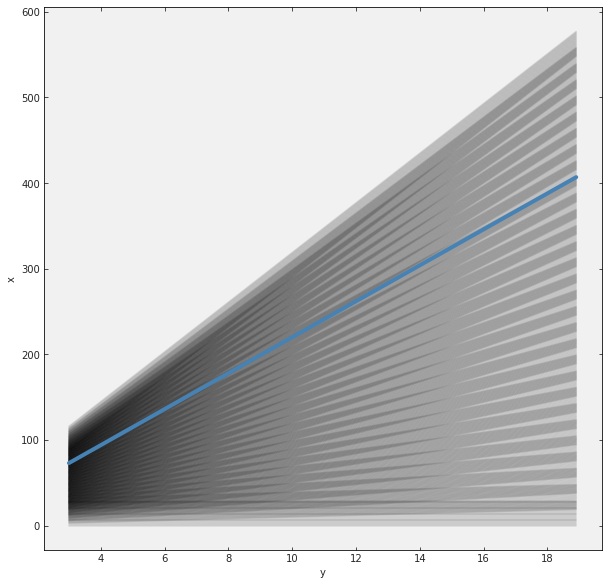

In [4]:
def loss(m, b, x, y):
    ''' L2 loss function 
    m: slope
    b: intercept
    x: data (numpy array)
    y: target (numpy array)
    ax: axis object for plot
    '''    
    return ((y - line(m, b, x))**2).sum() / x.shape[0]

res = np.zeros((30,30))
pl.figure(figsize=(10,10))
for i, m in enumerate(range(0, 30, 1)):
    for j, b in enumerate(range(0, 30, 1)):
        res[i,j] = loss(m, b, x, y)
        pl.plot(x,line(m, b, x), 'k', alpha=.1)
pl.plot(x, y, 'SteelBlue', lw=4)
pl.xlabel("y")
pl.ylabel("x");

/home/umer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


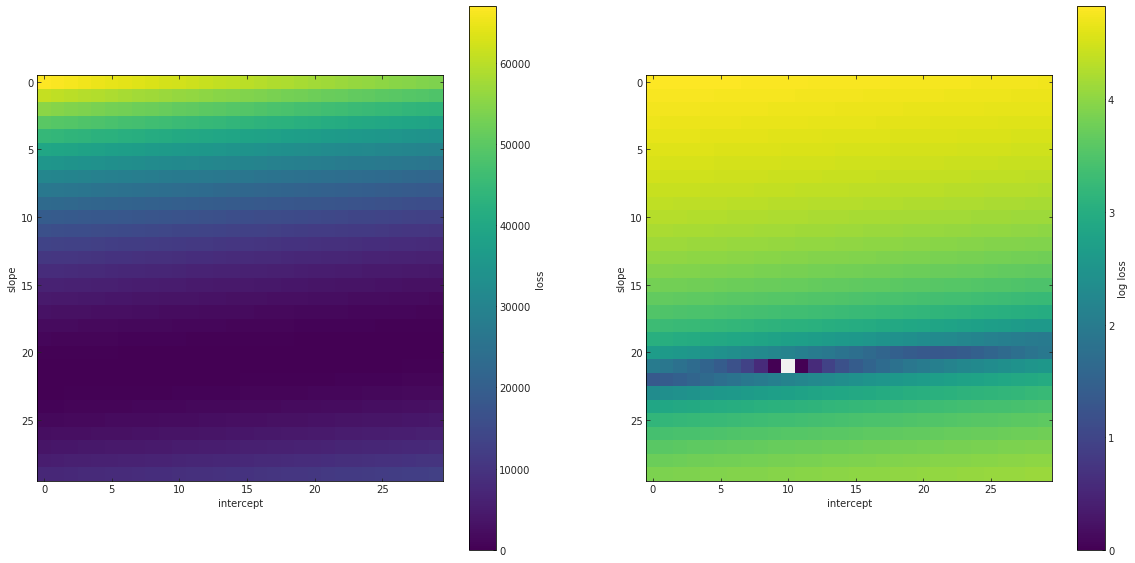

In [5]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
pl.imshow(res)
pl.colorbar(label="loss")
#pl.axis('off')
pl.xlabel("intercept")
pl.ylabel("slope");

ax2 = fig.add_subplot(122)
pl.imshow(np.log10(res))
pl.colorbar(label="log loss")
#pl.axis('off')
pl.xlabel("intercept")
pl.ylabel("slope");

In [6]:
# create the gradient descent

def gradDesc(m, b, x, y, alpha, ax=None):
    N = len(x)
    #partial derivative: -2x(y - (mx + b)), -2(y - (mx + b))
    f_m = np.mean(-2 * x * (y - (m * x + b)))
    f_b = np.mean(-2 * (y - (m * x + b)))
    # We subtract because the derivatives point in direction of steepest ascent
    m -= f_m / float(N) * alpha
    b -= f_b / float(N) * alpha
    #print (f_m, f_b)
    if not ax is None:
        ax.plot(m, b, 'ko', alpha=0.2)

    return m, b

In [18]:
#initial setup
x = np.arange(3, 19, 0.1)
y = 21 * x + 10

#### while loop
m = 0.2
b = 0.2
i = 0
ls = 1.0
steps = []
loss_f = []
while ls >= 0.01:
    ls = loss(m, b, x, y)
    loss_f.append(ls)
    i = i + 1
    steps.append(i)
    # print loss and call gradDesc in the loop. 
    print('Loss =', ls )
    m, b = gradDesc(m, b, x, y, 0.02)

# Print final set of parameters
print("m = %2f, b = %2f" %(m, b))

Loss = 65664.04640000008
Loss = 61082.662048345686
Loss = 56820.96973088254
Loss = 52856.661122093596
Loss = 49168.9845864454
Loss = 45738.63655151227
Loss = 42547.660461157175
Loss = 39579.352779827546
Loss = 36818.17555593478
Loss = 34249.67508661997
Loss = 31860.406258147115
Loss = 29637.86216587461
Loss = 27570.40864539259
Loss = 25647.223372121603
Loss = 23858.239210582302
Loss = 22194.091516791275
Loss = 20646.069117931176
Loss = 19206.068712692562
Loss = 17866.552453590495
Loss = 16620.508489215765
Loss = 15461.414259874338
Loss = 14383.202354481857
Loss = 13380.228749987024
Loss = 12447.243267069407
Loss = 11579.36208745858
Loss = 10772.042189013224
Loss = 10021.057564737672
Loss = 9322.47710125145
Loss = 8672.644000914133
Loss = 8068.156639888238
Loss = 7505.850761939301
Loss = 6982.78291476465
Loss = 6496.215042146287
Loss = 6043.60015127372
Loss = 5622.56898021067
Loss = 5230.91759571494
Loss = 4866.595856490739
Loss = 4527.696681483073
Loss = 4212.44606703777
Loss = 3919.19

Loss = 9.268954876920272
Loss = 9.268259073483327
Loss = 9.267563322279038
Loss = 9.26686762330363
Loss = 9.266171976552943
Loss = 9.265476382023268
Loss = 9.264780839710571
Loss = 9.26408534961089
Loss = 9.263389911720443
Loss = 9.262694526035233
Loss = 9.261999192551304
Loss = 9.261303911264852
Loss = 9.260608682171874
Loss = 9.259913505268408
Loss = 9.259218380550735
Loss = 9.258523308014691
Loss = 9.257828287656448
Loss = 9.25713331947219
Loss = 9.256438403457855
Loss = 9.25574353960963
Loss = 9.25504872792354
Loss = 9.254353968395662
Loss = 9.253659261022163
Loss = 9.252964605799002
Loss = 9.252270002722398
Loss = 9.251575451788346
Loss = 9.250880952993047
Loss = 9.25018650633233
Loss = 9.249492111802592
Loss = 9.248797769399696
Loss = 9.24810347911984
Loss = 9.247409240959092
Loss = 9.246715054913505
Loss = 9.246020920979191
Loss = 9.245326839152263
Loss = 9.244632809428726
Loss = 9.243938831804794
Loss = 9.243244906276466
Loss = 9.242551032839895
Loss = 9.241857211491048
Loss = 

Loss = 8.59602050091281
Loss = 8.59537521342494
Loss = 8.594729974377474
Loss = 8.594084783767027
Loss = 8.593439641589711
Loss = 8.592794547842228
Loss = 8.592149502520586
Loss = 8.591504505621376
Loss = 8.590859557140902
Loss = 8.59021465707547
Loss = 8.589569805421604
Loss = 8.588925002175513
Loss = 8.588280247333662
Loss = 8.587635540892336
Loss = 8.586990882847905
Loss = 8.58634627319681
Loss = 8.585701711935382
Loss = 8.58505719905997
Loss = 8.584412734566964
Loss = 8.583768318452758
Loss = 8.583123950713608
Loss = 8.582479631346068
Loss = 8.581835360346295
Loss = 8.581191137710844
Loss = 8.580546963435937
Loss = 8.57990283751804
Loss = 8.579258759953463
Loss = 8.578614730738687
Loss = 8.577970749869966
Loss = 8.577326817343742
Loss = 8.576682933156224
Loss = 8.57603909730405
Loss = 8.575395309783346
Loss = 8.57475157059069
Loss = 8.574107879722343
Loss = 8.573464237174615
Loss = 8.572820642943977
Loss = 8.572177097026838
Loss = 8.571533599419421
Loss = 8.57089015011822
Loss = 8.

Loss = 7.950426232075998
Loss = 7.949829408165272
Loss = 7.94923262905715
Loss = 7.9486358947479845
Loss = 7.9480392052347115
Loss = 7.947442560513798
Loss = 7.946845960581894
Loss = 7.946249405435606
Loss = 7.945652895071605
Loss = 7.945056429486662
Loss = 7.944460008677149
Loss = 7.943863632639929
Loss = 7.943267301371574
Loss = 7.9426710148687025
Loss = 7.942074773128039
Loss = 7.9414785761459985
Loss = 7.9408824239194775
Loss = 7.940286316444956
Loss = 7.939690253719192
Loss = 7.939094235738672
Loss = 7.938498262500272
Loss = 7.937902334000329
Loss = 7.937306450235761
Loss = 7.936710611203045
Loss = 7.936114816898876
Loss = 7.935519067319836
Loss = 7.934923362462728
Loss = 7.934327702324019
Loss = 7.9337320869004655
Loss = 7.933136516188656
Loss = 7.93254099018524
Loss = 7.931945508886869
Loss = 7.931350072290139
Loss = 7.930754680391797
Loss = 7.930159333188508
Loss = 7.92956403067671
Loss = 7.928968772853233
Loss = 7.9283735597146645
Loss = 7.927778391257613
Loss = 7.927183267478

Loss = 7.352214622128704
Loss = 7.351662704866131
Loss = 7.3511108290348846
Loss = 7.350558994631913
Loss = 7.35000720165427
Loss = 7.3494554500986045
Loss = 7.348903739961908
Loss = 7.348352071241159
Loss = 7.3478004439331155
Loss = 7.347248858034773
Loss = 7.346697313542893
Loss = 7.346145810454457
Loss = 7.3455943487663635
Loss = 7.345042928475541
Loss = 7.344491549578786
Loss = 7.343940212073032
Loss = 7.343388915955214
Loss = 7.342837661222134
Loss = 7.342286447870725
Loss = 7.341735275897898
Loss = 7.341184145300569
Loss = 7.340633056075623
Loss = 7.3400820082198255
Loss = 7.339531001730251
Loss = 7.338980036603753
Loss = 7.338429112837209
Loss = 7.337878230427471
Loss = 7.337327389371455
Loss = 7.336776589666011
Loss = 7.3362258313081785
Loss = 7.335675114294742
Loss = 7.335124438622529
Loss = 7.334573804288686
Loss = 7.334023211289828
Loss = 7.333472659623004
Loss = 7.332922149285139
Loss = 7.332371680273067
Loss = 7.33182125258364
Loss = 7.331270866213833
Loss = 7.330720521160

Loss = 6.805141738149675
Loss = 6.804630888644771
Loss = 6.804120077488323
Loss = 6.803609304677555
Loss = 6.803098570209592
Loss = 6.802587874081544
Loss = 6.80207721629048
Loss = 6.801566596833486
Loss = 6.801056015707845
Loss = 6.800545472910611
Loss = 6.800034968438867
Loss = 6.799524502289778
Loss = 6.79901407446039
Loss = 6.798503684947908
Loss = 6.797993333749443
Loss = 6.797483020862096
Loss = 6.7969727462829965
Loss = 6.796462510009251
Loss = 6.795952312038066
Loss = 6.7954421523665065
Loss = 6.794932030991636
Loss = 6.794421947910635
Loss = 6.79391190312068
Loss = 6.793401896618866
Loss = 6.792891928402247
Loss = 6.792381998468073
Loss = 6.7918721068133765
Loss = 6.791362253435302
Loss = 6.790852438330956
Loss = 6.79034266149757
Loss = 6.789832922932149
Loss = 6.789323222631923
Loss = 6.788813560593861
Loss = 6.788303936815214
Loss = 6.787794351293154
Loss = 6.787284804024674
Loss = 6.7867752950070095
Loss = 6.786265824237249
Loss = 6.785756391712594
Loss = 6.785246997429998


Loss = 6.307766806620983
Loss = 6.307293294139575
Loss = 6.306819817203912
Loss = 6.306346375811273
Loss = 6.305872969959074
Loss = 6.305399599644586
Loss = 6.3049262648650295
Loss = 6.304452965617948
Loss = 6.303979701900545
Loss = 6.303506473710215
Loss = 6.30303328104422
Loss = 6.302560123899852
Loss = 6.302087002274682
Loss = 6.301613916165815
Loss = 6.301140865570612
Loss = 6.300667850486436
Loss = 6.300194870910712
Loss = 6.299721926840628
Loss = 6.2992490182736445
Loss = 6.298776145207038
Loss = 6.298303307638165
Loss = 6.297830505564303
Loss = 6.297357738982755
Loss = 6.296885007891055
Loss = 6.296412312286365
Loss = 6.295939652166051
Loss = 6.295467027527441
Loss = 6.2949944383679135
Loss = 6.294521884684803
Loss = 6.294049366475458
Loss = 6.293576883737121
Loss = 6.2931044364672175
Loss = 6.29263202466308
Loss = 6.292159648322065
Loss = 6.2916873074413875
Loss = 6.291215002018532
Loss = 6.290742732050761
Loss = 6.290270497535412
Loss = 6.289798298469903
Loss = 6.2893261348514

Loss = 5.8296511896336165
Loss = 5.829213568414451
Loss = 5.8287759800466485
Loss = 5.828338424527855
Loss = 5.827900901855495
Loss = 5.827463412027194
Loss = 5.827025955040495
Loss = 5.826588530892809
Loss = 5.826151139581789
Loss = 5.825713781104916
Loss = 5.8252764554597505
Loss = 5.824839162643825
Loss = 5.824401902654661
Loss = 5.82396467548982
Loss = 5.823527481146778
Loss = 5.823090319623135
Loss = 5.822653190916419
Loss = 5.822216095024149
Loss = 5.821779031943898
Loss = 5.821342001673098
Loss = 5.82090500420943
Loss = 5.820468039550301
Loss = 5.820031107693389
Loss = 5.81959420863609
Loss = 5.81915734237597
Loss = 5.818720508910616
Loss = 5.8182837082375976
Loss = 5.817846940354374
Loss = 5.817410205258473
Loss = 5.816973502947554
Loss = 5.816536833419038
Loss = 5.816100196670536
Loss = 5.815663592699523
Loss = 5.815227021503523
Loss = 5.814790483080206
Loss = 5.81435397742695
Loss = 5.813917504541376
Loss = 5.8134810644210875
Loss = 5.81304465706356
Loss = 5.812608282466225
L

Loss = 5.401545139187289
Loss = 5.401139655103853
Loss = 5.400734201459359
Loss = 5.400328778251582
Loss = 5.39992338547812
Loss = 5.399518023136764
Loss = 5.399112691225256
Loss = 5.3987073897411975
Loss = 5.39830211868244
Loss = 5.397896878046566
Loss = 5.397491667831433
Loss = 5.3970864880346054
Loss = 5.39668133865394
Loss = 5.39627621968716
Loss = 5.395871131131807
Loss = 5.395466072985753
Loss = 5.395061045246669
Loss = 5.394656047912276
Loss = 5.394251080980274
Loss = 5.39384614444842
Loss = 5.393441238314431
Loss = 5.393036362575921
Loss = 5.392631517230751
Loss = 5.392226702276562
Loss = 5.391821917711087
Loss = 5.39141716353209
Loss = 5.391012439737215
Loss = 5.390607746324145
Loss = 5.390203083290791
Loss = 5.389798450634656
Loss = 5.389393848353551
Loss = 5.3889892764452565
Loss = 5.388584734907381
Loss = 5.388180223737747
Loss = 5.387775742934002
Loss = 5.38737129249388
Loss = 5.386966872415113
Loss = 5.3865624826954175
Loss = 5.386158123332551
Loss = 5.385753794324144
Los

Loss = 4.9928688244154165
Loss = 4.992494018913146
Loss = 4.992119241546804
Loss = 4.99174449231437
Loss = 4.991369771213636
Loss = 4.990995078242502
Loss = 4.990620413398945
Loss = 4.990245776680757
Loss = 4.989871168085862
Loss = 4.989496587612148
Loss = 4.989122035257499
Loss = 4.988747511019814
Loss = 4.9883730148969665
Loss = 4.987998546886854
Loss = 4.987624106987387
Loss = 4.987249695196442
Loss = 4.986875311511865
Loss = 4.986500955931649
Loss = 4.986126628453546
Loss = 4.985752329075514
Loss = 4.985378057795546
Loss = 4.98500381461132
Loss = 4.984629599520934
Loss = 4.984255412522147
Loss = 4.983881253612904
Loss = 4.983507122791111
Loss = 4.98313302005459
Loss = 4.982758945401223
Loss = 4.9823848988290385
Loss = 4.982010880335799
Loss = 4.981636889919471
Loss = 4.981262927577914
Loss = 4.98088899330907
Loss = 4.980515087110712
Loss = 4.980141208980827
Loss = 4.979767358917324
Loss = 4.9793935369179865
Loss = 4.979019742980857
Loss = 4.978645977103705
Loss = 4.978272239284501


Loss = 4.616152112481262
Loss = 4.6158055864114225
Loss = 4.61545908635465
Loss = 4.615112612308947
Loss = 4.614766164272452
Loss = 4.614419742243155
Loss = 4.614073346219156
Loss = 4.613726976198459
Loss = 4.613380632179121
Loss = 4.613034314159214
Loss = 4.612688022136721
Loss = 4.6123417561097515
Loss = 4.611995516076375
Loss = 4.611649302034541
Loss = 4.611303113982373
Loss = 4.610956951917946
Loss = 4.61061081583924
Loss = 4.610264705744326
Loss = 4.609918621631308
Loss = 4.609572563498176
Loss = 4.609226531342956
Loss = 4.608880525163724
Loss = 4.608534544958594
Loss = 4.608188590725573
Loss = 4.607842662462651
Loss = 4.607496760167971
Loss = 4.607150883839483
Loss = 4.606805033475342
Loss = 4.606459209073539
Loss = 4.606113410632112
Loss = 4.605767638149208
Loss = 4.605421891622787
Loss = 4.605076171050882
Loss = 4.604730476431626
Loss = 4.604384807763047
Loss = 4.604039165043117
Loss = 4.603693548269998
Loss = 4.603347957441706
Loss = 4.603002392556239
Loss = 4.602656853611683


Loss = 4.265296666072042
Loss = 4.264976478076792
Loss = 4.264656314117508
Loss = 4.264336174192302
Loss = 4.264016058299504
Loss = 4.263695966437127
Loss = 4.263375898603463
Loss = 4.263055854796758
Loss = 4.262735835015113
Loss = 4.262415839256837
Loss = 4.262095867519989
Loss = 4.261775919802847
Loss = 4.261455996103569
Loss = 4.261136096420382
Loss = 4.260816220751502
Loss = 4.2604963690950735
Loss = 4.260176541449373
Loss = 4.259856737812485
Loss = 4.259536958182719
Loss = 4.259217202558222
Loss = 4.258897470937181
Loss = 4.258577763317774
Loss = 4.258258079698249
Loss = 4.25793842007683
Loss = 4.2576187844516
Loss = 4.2572991728208756
Loss = 4.256979585182773
Loss = 4.25666002153556
Loss = 4.256340481877432
Loss = 4.25602096620649
Loss = 4.2557014745210795
Loss = 4.255382006819285
Loss = 4.255062563099337
Loss = 4.254743143359481
Loss = 4.254423747597841
Loss = 4.2541043758126325
Loss = 4.253785028002088
Loss = 4.253465704164454
Loss = 4.253146404297832
Loss = 4.252827128400504
L

Loss = 3.9301766157511198
Loss = 3.929881584603239
Loss = 3.9295865756028476
Loss = 3.929291588748188
Loss = 3.928996624037609
Loss = 3.9287016814695845
Loss = 3.928406761042294
Loss = 3.9281118627541196
Loss = 3.9278169866034878
Loss = 3.9275221325886127
Loss = 3.9272273007079237
Loss = 3.926932490959719
Loss = 3.9266377033423354
Loss = 3.9263429378540757
Loss = 3.9260481944933914
Loss = 3.9257534732585198
Loss = 3.925458774147818
Loss = 3.925164097159661
Loss = 3.9248694422923114
Loss = 3.9245748095442075
Loss = 3.924280198913665
Loss = 3.923985610398983
Loss = 3.923691043998508
Loss = 3.92339649971059
Loss = 3.9231019775335456
Loss = 3.9228074774658
Loss = 3.9225129995056376
Loss = 3.9222185436513315
Loss = 3.9219241099013304
Loss = 3.9216296982539136
Loss = 3.9213353087074507
Loss = 3.9210409412602565
Loss = 3.9207465959107006
Loss = 3.9204522726571307
Loss = 3.920157971497814
Loss = 3.9198636924311487
Loss = 3.919569435455532
Loss = 3.919275200569234
Loss = 3.9189809877705613
Loss

Loss = 3.6257389994786577
Loss = 3.625466821904072
Loss = 3.62519466476141
Loss = 3.6249225280490345
Loss = 3.624650411765411
Loss = 3.624378315909123
Loss = 3.6241062404785858
Loss = 3.6238341854722322
Loss = 3.6235621508885423
Loss = 3.623290136725997
Loss = 3.623018142983036
Loss = 3.622746169658174
Loss = 3.6224742167498385
Loss = 3.622202284256504
Loss = 3.6219303721766445
Loss = 3.621658480508713
Loss = 3.6213866092512292
Loss = 3.62111475840263
Loss = 3.620842927961347
Loss = 3.620571117925844
Loss = 3.620299328294645
Loss = 3.6200275590662265
Loss = 3.6197558102389946
Loss = 3.6194840818114344
Loss = 3.6192123737820268
Loss = 3.6189406861493176
Loss = 3.6186690189116177
Loss = 3.618397372067533
Loss = 3.618125745615403
Loss = 3.617854139553875
Loss = 3.617582553881241
Loss = 3.6173109885960835
Loss = 3.617039443696824
Loss = 3.616767919181897
Loss = 3.6164964150498475
Loss = 3.6162249312991306
Loss = 3.6159534679282395
Loss = 3.615682024935533
Loss = 3.6154106023196055
Loss = 3

Loss = 3.3541873483218168
Loss = 3.35393555563144
Loss = 3.3536837818427307
Loss = 3.3534320269541986
Loss = 3.3531802909644726
Loss = 3.352928573872054
Loss = 3.3526768756755745
Loss = 3.3524251963736793
Loss = 3.3521735359648233
Loss = 3.3519218944477265
Loss = 3.3516702718208067
Loss = 3.351418668082809
Loss = 3.3511670832322005
Loss = 3.350915517267609
Loss = 3.3506639701876653
Loss = 3.3504124419908052
Loss = 3.3501609326757844
Loss = 3.3499094422411027
Loss = 3.3496579706853162
Loss = 3.3494065180070436
Loss = 3.3491550842048476
Loss = 3.3489036692773384
Loss = 3.348652273223108
Loss = 3.348400896040682
Loss = 3.3481495377287054
Loss = 3.3478981982857063
Loss = 3.3476468777103334
Loss = 3.3473955760011167
Loss = 3.3471442931566635
Loss = 3.3468930291755776
Loss = 3.3466417840563425
Loss = 3.3463905577977195
Loss = 3.3461393503981447
Loss = 3.3458881618562173
Loss = 3.3456369921705837
Loss = 3.3453858413398208
Loss = 3.34513470936245
Loss = 3.344883596237117
Loss = 3.3446325019623

Loss = 3.095528463698294
Loss = 3.0952960880558686
Loss = 3.0950637298574257
Loss = 3.094831389101725
Loss = 3.0945990657874183
Loss = 3.094366759913188
Loss = 3.0941344714777204
Loss = 3.0939022004797314
Loss = 3.0936699469178692
Loss = 3.093437710790883
Loss = 3.0932054920974656
Loss = 3.09297329083624
Loss = 3.092741107005949
Loss = 3.0925089406052497
Loss = 3.0922767916329295
Loss = 3.092044660087507
Loss = 3.091812545967841
Loss = 3.0915804492725423
Loss = 3.0913483700003384
Loss = 3.0911163081498407
Loss = 3.0908842637198117
Loss = 3.0906522367089737
Loss = 3.090420227115984
Loss = 3.090188234939464
Loss = 3.0899562601782087
Loss = 3.089724302830887
Loss = 3.0894923628961553
Loss = 3.0892604403727124
Loss = 3.0890285352592928
Loss = 3.0887966475545925
Loss = 3.088564777257247
Loss = 3.088332924365976
Loss = 3.088101088879463
Loss = 3.087869270796457
Loss = 3.0876374701155824
Loss = 3.0874056868355844
Loss = 3.0871739209551166
Loss = 3.086942172472855
Loss = 3.0867104413875537
Los

Loss = 2.8641172045833643
Loss = 2.8639022005595827
Loss = 2.863687212675767
Loss = 2.8634722409307014
Loss = 2.863257285323183
Loss = 2.863042345851962
Loss = 2.8628274225158687
Loss = 2.862612515313608
Loss = 2.862397624244113
Loss = 2.8621827493060783
Loss = 2.8619678904982884
Loss = 2.861753047819609
Loss = 2.8615382212687357
Loss = 2.8613234108444767
Loss = 2.861108616545688
Loss = 2.8608938383711227
Loss = 2.860679076319533
Loss = 2.8604643303897346
Loss = 2.860249600580498
Loss = 2.8600348868906673
Loss = 2.859820189318955
Loss = 2.8596055078642593
Loss = 2.8593908425252406
Loss = 2.8591761933008266
Loss = 2.858961560189716
Loss = 2.858746943190684
Loss = 2.8585323423026066
Loss = 2.8583177575241665
Loss = 2.858103188854263
Loss = 2.857888636291615
Loss = 2.8576740998350116
Loss = 2.8574595794832724
Loss = 2.8572450752352005
Loss = 2.8570305870895703
Loss = 2.856816115045163
Loss = 2.8566016591007584
Loss = 2.8563872192552138
Loss = 2.856172795507282
Loss = 2.855958387855698
Los

Loss = 2.6355226788399477
Loss = 2.6353248349877743
Loss = 2.635127005987416
Loss = 2.6349291918377253
Loss = 2.6347313925375895
Loss = 2.6345336080858974
Loss = 2.6343358384814657
Loss = 2.6341380837232906
Loss = 2.6339403438101554
Loss = 2.633742618740988
Loss = 2.6335449085147196
Loss = 2.6333472131302105
Loss = 2.633149532586276
Loss = 2.632951866881901
Loss = 2.6327542160158908
Loss = 2.6325565799871997
Loss = 2.632358958794645
Loss = 2.6321613524372025
Loss = 2.6319637609136337
Loss = 2.6317661842229407
Loss = 2.631568622364015
Loss = 2.6313710753356103
Loss = 2.6311735431367578
Loss = 2.630976025766281
Loss = 2.6307785232230625
Loss = 2.630581035505968
Loss = 2.630383562613931
Loss = 2.6301861045458503
Loss = 2.6299886613005663
Loss = 2.629791232876979
Loss = 2.6295938192739774
Loss = 2.629396420490451
Loss = 2.629199036525276
Loss = 2.629001667377378
Loss = 2.6288043130456136
Loss = 2.6286069735288526
Loss = 2.6284096488260738
Loss = 2.6282123389360383
Loss = 2.628015043857732


Loss = 2.4601970071461445
Loss = 2.460012324670522
Loss = 2.4598276560586454
Loss = 2.4596430013095287
Loss = 2.459458360422132
Loss = 2.4592737333953707
Loss = 2.4590891202281884
Loss = 2.4589045209196128
Loss = 2.4587199354685536
Loss = 2.4585353638740033
Loss = 2.45835080613488
Loss = 2.458166262250155
Loss = 2.4579817322188475
Loss = 2.457797216039841
Loss = 2.4576127137121127
Loss = 2.4574282252346764
Loss = 2.4572437506064513
Loss = 2.4570592898263293
Loss = 2.456874842893393
Loss = 2.4566904098065647
Loss = 2.4565059905647644
Loss = 2.4563215851670046
Loss = 2.456137193612158
Loss = 2.455952815899328
Loss = 2.4557684520273493
Loss = 2.4555841019952167
Loss = 2.4553997658019004
Loss = 2.4552154434464177
Loss = 2.455031134927606
Loss = 2.4548468402445236
Loss = 2.4546625593961613
Loss = 2.454478292381374
Loss = 2.4542940391991483
Loss = 2.454109799848505
Loss = 2.453925574328366
Loss = 2.453741362637687
Loss = 2.453557164775431
Loss = 2.4533729807406144
Loss = 2.4531888105321284
L

Loss = 2.2711602720698685
Loss = 2.2709897802351007
Loss = 2.270819301198914
Loss = 2.2706488349601974
Loss = 2.2704783815181218
Loss = 2.270307940871617
Loss = 2.2701375130197956
Loss = 2.2699670979616924
Loss = 2.2697966956963627
Loss = 2.269626306222809
Loss = 2.2694559295400523
Loss = 2.269285565647181
Loss = 2.2691152145431834
Loss = 2.2689448762271835
Loss = 2.2687745506981405
Loss = 2.2686042379550946
Loss = 2.268433937997144
Loss = 2.2682636508232887
Loss = 2.2680933764325824
Loss = 2.2679231148240477
Loss = 2.2677528659967705
Loss = 2.2675826299497777
Loss = 2.2674124066820482
Loss = 2.2672421961926474
Loss = 2.2670719984806706
Loss = 2.266901813545147
Loss = 2.266731641385081
Loss = 2.266561481999477
Loss = 2.266391335387499
Loss = 2.2662212015480656
Loss = 2.2660510804802594
Loss = 2.2658809721831763
Loss = 2.2657108766557608
Loss = 2.2655407938971357
Loss = 2.265370723906351
Loss = 2.2652006666823605
Loss = 2.265030622224239
Loss = 2.2648605905310566
Loss = 2.26469057160184

Loss = 2.0988534737995024
Loss = 2.0986959167199943
Loss = 2.0985383714679795
Loss = 2.0983808380425697
Loss = 2.098223316442975
Loss = 2.0980658066682025
Loss = 2.0979083087173738
Loss = 2.0977508225896524
Loss = 2.0975933482841307
Loss = 2.0974358857999116
Loss = 2.0972784351360962
Loss = 2.0971209962918334
Loss = 2.096963569266219
Loss = 2.0968061540583354
Loss = 2.096648750667357
Loss = 2.096491359092356
Loss = 2.096333979332449
Loss = 2.0961766113867477
Loss = 2.0960192552543413
Loss = 2.095861910934412
Loss = 2.0957045784259987
Loss = 2.095547257728284
Loss = 2.095389948840308
Loss = 2.0952326517612705
Loss = 2.0950753664901764
Loss = 2.094918093026251
Loss = 2.0947608313685406
Loss = 2.094603581516167
Loss = 2.094446343468251
Loss = 2.0942891172239304
Loss = 2.0941319027822587
Loss = 2.0939747001423994
Loss = 2.093817509303484
Loss = 2.0936603302645382
Loss = 2.0935031630247862
Loss = 2.093346007583253
Loss = 2.093188863939107
Loss = 2.0930317320914265
Loss = 2.092874612039381
L

Loss = 1.9381635823958951
Loss = 1.9380180880116793
Loss = 1.9378726045494923
Loss = 1.9377271320084664
Loss = 1.937581670387798
Loss = 1.937436219686687
Loss = 1.9372907799042516
Loss = 1.9371453510397387
Loss = 1.9369999330922898
Loss = 1.936854526061093
Loss = 1.9367091299453727
Loss = 1.9365637447442545
Loss = 1.9364183704569293
Loss = 1.9362730070825969
Loss = 1.9361276546204096
Loss = 1.9359823130695948
Loss = 1.9358369824292416
Loss = 1.9356916626986596
Loss = 1.9355463538769346
Loss = 1.9354010559632784
Loss = 1.9352557689568584
Loss = 1.9351104928569005
Loss = 1.9349652276625264
Loss = 1.9348199733729534
Loss = 1.9346747299873208
Loss = 1.9345294975048801
Loss = 1.9343842759248022
Loss = 1.9342390652461838
Loss = 1.9340938654682849
Loss = 1.9339486765902762
Loss = 1.9338034986113235
Loss = 1.9336583315306086
Loss = 1.9335131753473291
Loss = 1.9333680300606368
Loss = 1.9332228956697626
Loss = 1.9330777721738575
Loss = 1.932932659572129
Loss = 1.9327875578636644
Loss = 1.9326424

Loss = 1.7938115870995972
Loss = 1.7936769289548313
Loss = 1.7935422809185984
Loss = 1.7934076429902013
Loss = 1.7932730151687757
Loss = 1.793138397453617
Loss = 1.7930037898439661
Loss = 1.7928691923391042
Loss = 1.7927346049381843
Loss = 1.7926000276405212
Loss = 1.792465460445317
Loss = 1.7923309033517956
Loss = 1.7921963563592818
Loss = 1.7920618194669147
Loss = 1.791927292674001
Loss = 1.791792775979777
Loss = 1.791658269383476
Loss = 1.7915237728843287
Loss = 1.7913892864816137
Loss = 1.7912548101745223
Loss = 1.791120343962286
Loss = 1.7909858878442517
Loss = 1.7908514418195545
Loss = 1.7907170058874609
Loss = 1.7905825800472406
Loss = 1.7904481642981422
Loss = 1.7903137586393292
Loss = 1.7901793630701548
Loss = 1.7900449775898175
Loss = 1.7899106021975324
Loss = 1.7897762368925214
Loss = 1.7896418816741442
Loss = 1.7895075365415152
Loss = 1.7893732014939363
Loss = 1.789238876530661
Loss = 1.7891045616508872
Loss = 1.7889702568539014
Loss = 1.7888359621389394
Loss = 1.7887016775

Loss = 1.6618317759131132
Loss = 1.6617070252506374
Loss = 1.661582283952961
Loss = 1.6614575520194124
Loss = 1.6613328294492224
Loss = 1.6612081162417696
Loss = 1.6610834123962843
Loss = 1.6609587179120777
Loss = 1.6608340327884843
Loss = 1.6607093570247808
Loss = 1.6605846906202402
Loss = 1.660460033574139
Loss = 1.6603353858858623
Loss = 1.660210747554629
Loss = 1.6600861185798048
Loss = 1.6599614989606117
Loss = 1.6598368886964159
Loss = 1.6597122877864734
Loss = 1.6595876962300853
Loss = 1.659463114026585
Loss = 1.659338541175209
Loss = 1.6592139776752668
Loss = 1.659089423526139
Loss = 1.658964878727031
Loss = 1.658840343277254
Loss = 1.6587158171761387
Loss = 1.6585913004229815
Loss = 1.6584667930170625
Loss = 1.6583422949577027
Loss = 1.6582178062441486
Loss = 1.6580933268757403
Loss = 1.657968856851787
Loss = 1.6578443961715954
Loss = 1.6577199448344
Loss = 1.6575955028395342
Loss = 1.6574710701862845
Loss = 1.6573466468740363
Loss = 1.6572222329019692
Loss = 1.657097828269403

Loss = 1.5354072530725555
Loss = 1.5352919928670643
Loss = 1.5351767413139463
Loss = 1.535061498412547
Loss = 1.5349462641622473
Loss = 1.534831038562331
Loss = 1.5347158216121872
Loss = 1.534600613311224
Loss = 1.534485413658669
Loss = 1.5343702226539886
Loss = 1.534255040296463
Loss = 1.5341398665854933
Loss = 1.5340247015203636
Loss = 1.5339095451004778
Loss = 1.5337943973251718
Loss = 1.5336792581938148
Loss = 1.5335641277057435
Loss = 1.5334490058602814
Loss = 1.5333338926567983
Loss = 1.5332187880946955
Loss = 1.5331036921732306
Loss = 1.5329886048918273
Loss = 1.5328735262498514
Loss = 1.5327584562465788
Loss = 1.5326433948814226
Loss = 1.5325283421536575
Loss = 1.5324132980627456
Loss = 1.532298262607966
Loss = 1.532183235788705
Loss = 1.532068217604241
Loss = 1.5319532080540377
Loss = 1.531838207137383
Loss = 1.531723214853605
Loss = 1.5316082312020913
Loss = 1.5314932561822328
Loss = 1.5313782897932806
Loss = 1.5312633320346862
Loss = 1.5311483829057504
Loss = 1.5310334424058

Loss = 1.4176423889036756
Loss = 1.4175359690904876
Loss = 1.4174295572660174
Loss = 1.4173231534296797
Loss = 1.4172167575809134
Loss = 1.4171103697190672
Loss = 1.4170039898435856
Loss = 1.4168976179538195
Loss = 1.4167912540492276
Loss = 1.4166848981291533
Loss = 1.4165785501930404
Loss = 1.4164722102402731
Loss = 1.4163658782702093
Loss = 1.4162595542823238
Loss = 1.416153238275975
Loss = 1.4160469302505874
Loss = 1.4159406302055533
Loss = 1.4158343381402556
Loss = 1.4157280540541108
Loss = 1.415621777946513
Loss = 1.4155155098168755
Loss = 1.415409249664588
Loss = 1.4153029974890576
Loss = 1.4151967532896896
Loss = 1.4150905170658554
Loss = 1.414984288816983
Loss = 1.4148780685424955
Loss = 1.4147718562417542
Loss = 1.4146656519141925
Loss = 1.4145594555591596
Loss = 1.4144532671761054
Loss = 1.4143470867644452
Loss = 1.4142409143235324
Loss = 1.4141347498527914
Loss = 1.4140285933516235
Loss = 1.4139224448193861
Loss = 1.4138163042555818
Loss = 1.4137101716595437
Loss = 1.4136040

Loss = 1.3085170372816877
Loss = 1.3084188093084446
Loss = 1.3083205887089764
Loss = 1.3082223754827391
Loss = 1.308124169629198
Loss = 1.30802597114779
Loss = 1.3079277800379576
Loss = 1.307829596299142
Loss = 1.3077314199308228
Loss = 1.307633250932411
Loss = 1.307535089303353
Loss = 1.3074369350431376
Loss = 1.3073387881511513
Loss = 1.3072406486268888
Loss = 1.3071425164697903
Loss = 1.3070443916792829
Loss = 1.3069462742548084
Loss = 1.3068481641958798
Loss = 1.3067500615018166
Loss = 1.3066519661722216
Loss = 1.3065538782064094
Loss = 1.3064557976038866
Loss = 1.3063577243641349
Loss = 1.3062596584865207
Loss = 1.3061615999705425
Loss = 1.3060635488156014
Loss = 1.3059655050212444
Loss = 1.3058674685867977
Loss = 1.3057694395118107
Loss = 1.305671417795682
Loss = 1.3055734034378452
Loss = 1.3054753964377663
Loss = 1.3053773967949152
Loss = 1.3052794045086866
Loss = 1.3051814195785774
Loss = 1.3050834420040178
Loss = 1.304985471784447
Loss = 1.3048875089193435
Loss = 1.30478955340

Loss = 1.2088803204914664
Loss = 1.2087895720637207
Loss = 1.2086988304483248
Loss = 1.2086080956446887
Loss = 1.208517367652389
Loss = 1.208426646470858
Loss = 1.208335932099579
Loss = 1.208245224538085
Loss = 1.2081545237858322
Loss = 1.208063829842341
Loss = 1.2079731427070242
Loss = 1.2078824623794773
Loss = 1.2077917888591012
Loss = 1.2077011221454623
Loss = 1.2076104622379695
Loss = 1.2075198091361483
Loss = 1.2074291628395186
Loss = 1.2073385233475284
Loss = 1.2072478906596829
Loss = 1.2071572647754483
Loss = 1.207066645694341
Loss = 1.206976033415827
Loss = 1.2068854279394263
Loss = 1.206794829264627
Loss = 1.2067042373908774
Loss = 1.206613652317736
Loss = 1.2065230740446018
Loss = 1.2064325025710463
Loss = 1.20634193789649
Loss = 1.2062513800204662
Loss = 1.206160828942481
Loss = 1.2060702846619884
Loss = 1.205979747178485
Loss = 1.2058892164914787
Loss = 1.2057986926004305
Loss = 1.2057081755048327
Loss = 1.2056176652042008
Loss = 1.205527161698004
Loss = 1.2054366649857673


Loss = 1.1137325843476131
Loss = 1.1136489784858778
Loss = 1.1135653789002498
Loss = 1.113481785590328
Loss = 1.1133981985555668
Loss = 1.1133146177955333
Loss = 1.1132310433097774
Loss = 1.1131474750977912
Loss = 1.1130639131591327
Loss = 1.1129803574932855
Loss = 1.11289680809984
Loss = 1.112813264978266
Loss = 1.1127297281281296
Loss = 1.1126461975489559
Loss = 1.1125626732402545
Loss = 1.1124791552016153
Loss = 1.112395643432461
Loss = 1.1123121379324175
Loss = 1.1122286387009626
Loss = 1.112145145737667
Loss = 1.1120616590420203
Loss = 1.1119781786135605
Loss = 1.1118947044518435
Loss = 1.1118112365563693
Loss = 1.1117277749266514
Loss = 1.1116443195622643
Loss = 1.1115608704627362
Loss = 1.1114774276275299
Loss = 1.111393991056271
Loss = 1.1113105607484273
Loss = 1.1112271367035629
Loss = 1.1111437189211635
Loss = 1.1110603074007888
Loss = 1.1109769021419544
Loss = 1.110893503144195
Loss = 1.1108101104070784
Loss = 1.110726723930081
Loss = 1.110643343712756
Loss = 1.1105599697546

Loss = 1.0256116059010203
Loss = 1.0255346151194757
Loss = 1.0254576301174447
Loss = 1.0253806508945502
Loss = 1.0253036774503435
Loss = 1.0252267097844088
Loss = 1.0251497478962786
Loss = 1.0250727917855191
Loss = 1.0249958414517355
Loss = 1.0249188968944687
Loss = 1.0248419581132733
Loss = 1.024765025107762
Loss = 1.024688097877451
Loss = 1.0246111764219465
Loss = 1.0245342607407786
Loss = 1.024457350833517
Loss = 1.0243804466997337
Loss = 1.0243035483390348
Loss = 1.0242266557509545
Loss = 1.024149768935037
Loss = 1.02407288789088
Loss = 1.0239960126180452
Loss = 1.023919143116094
Loss = 1.0238422793845934
Loss = 1.0237654214231062
Loss = 1.0236885692312356
Loss = 1.0236117228084969
Loss = 1.0235348821544679
Loss = 1.0234580472687314
Loss = 1.0233812181508526
Loss = 1.0233043948004075
Loss = 1.023227577216931
Loss = 1.0231507654000067
Loss = 1.0230739593492173
Loss = 1.022997159064097
Loss = 1.0229203645442606
Loss = 1.0228435757892254
Loss = 1.0227667927986093
Loss = 1.022690015571

Loss = 0.9473744041743954
Loss = 0.9473032865160274
Loss = 0.9472321741963012
Loss = 0.9471610672148671
Loss = 0.947089965571293
Loss = 0.9470188692652102
Loss = 0.9469477782961888
Loss = 0.9468766926638136
Loss = 0.9468056123677178
Loss = 0.9467345374074922
Loss = 0.9466634677827248
Loss = 0.9465924034930611
Loss = 0.9465213445380218
Loss = 0.9464502909172487
Loss = 0.9463792426303641
Loss = 0.9463081996769306
Loss = 0.946237162056563
Loss = 0.9461661297688533
Loss = 0.9460951028134332
Loss = 0.9460240811898638
Loss = 0.9459530648977372
Loss = 0.9458820539366872
Loss = 0.9458110483062893
Loss = 0.9457400480061736
Loss = 0.9456690530358987
Loss = 0.9455980633951144
Loss = 0.9455270790833727
Loss = 0.9454561001002943
Loss = 0.9453851264454951
Loss = 0.9453141581185299
Loss = 0.9452431951190257
Loss = 0.9451722374466073
Loss = 0.9451012851008489
Loss = 0.9450303380813383
Loss = 0.9449593963877119
Loss = 0.9448884600195321
Loss = 0.9448175289764237
Loss = 0.9447466032579722
Loss = 0.94467

Loss = 0.8764860904000148
Loss = 0.8764202941972814
Loss = 0.8763545029337644
Loss = 0.8762887166090764
Loss = 0.876222935222829
Loss = 0.8761571587746648
Loss = 0.8760913872642601
Loss = 0.8760256206911766
Loss = 0.8759598590550575
Loss = 0.8758941023555458
Loss = 0.8758283505922823
Loss = 0.8757626037648745
Loss = 0.8756968618729776
Loss = 0.8756311249161766
Loss = 0.875565392894128
Loss = 0.8754996658064776
Loss = 0.875433943652865
Loss = 0.8753682264328495
Loss = 0.8753025141461098
Loss = 0.8752368067922941
Loss = 0.875171104371001
Loss = 0.8751054068818626
Loss = 0.8750397143245137
Loss = 0.8749740266985867
Loss = 0.8749083440037164
Loss = 0.8748426662395037
Loss = 0.8747769934056364
Loss = 0.874711325501669
Loss = 0.8746456625272856
Loss = 0.8745800044821139
Loss = 0.8745143513657586
Loss = 0.8744487031778693
Loss = 0.874383059918069
Loss = 0.8743174215859808
Loss = 0.87425178818124
Loss = 0.8741861597035024
Loss = 0.8741205361523416
Loss = 0.8740549175274305
Loss = 0.87398930382

Loss = 0.80919935545647
Loss = 0.8091386103454677
Loss = 0.8090778697945137
Loss = 0.8090171338032264
Loss = 0.8089564023713136
Loss = 0.8088956754983567
Loss = 0.8088349531840772
Loss = 0.8087742354280898
Loss = 0.8087135222300865
Loss = 0.8086528135897264
Loss = 0.808592109506639
Loss = 0.808531409980508
Loss = 0.8084707150109649
Loss = 0.8084100245976675
Loss = 0.8083493387403081
Loss = 0.8082886574385043
Loss = 0.8082279806919666
Loss = 0.8081673085003047
Loss = 0.8081066408631928
Loss = 0.8080459777802975
Loss = 0.8079853192512509
Loss = 0.8079246652757373
Loss = 0.8078640158534194
Loss = 0.807803370983922
Loss = 0.8077427306669407
Loss = 0.8076820949021084
Loss = 0.8076214636890908
Loss = 0.8075608370275222
Loss = 0.8075002149171236
Loss = 0.8074395973575029
Loss = 0.8073789843483364
Loss = 0.8073183758892603
Loss = 0.8072577719799732
Loss = 0.8071971726200953
Loss = 0.8071365778092993
Loss = 0.8070759875472472
Loss = 0.8070154018336201
Loss = 0.8069548206680274
Loss = 0.80689424

Loss = 0.7500565059024429
Loss = 0.7500002005366465
Loss = 0.7499438993976222
Loss = 0.7498876024850175
Loss = 0.7498313097984864
Loss = 0.7497750213377714
Loss = 0.7497187371025289
Loss = 0.7496624570924524
Loss = 0.7496061813071797
Loss = 0.7495499097464426
Loss = 0.7494936424099216
Loss = 0.7494373792972783
Loss = 0.7493811204081962
Loss = 0.7493248657423603
Loss = 0.749268615299491
Loss = 0.7492123690792057
Loss = 0.7491561270812349
Loss = 0.7490998893052438
Loss = 0.7490436557509211
Loss = 0.7489874264179506
Loss = 0.7489312013060195
Loss = 0.7488749804147699
Loss = 0.7488187637439708
Loss = 0.7487625512932189
Loss = 0.7487063430622418
Loss = 0.7486501390507202
Loss = 0.7485939392583119
Loss = 0.74853774368473
Loss = 0.7484815523296573
Loss = 0.748425365192736
Loss = 0.7483691822737119
Loss = 0.7483130035722182
Loss = 0.7482568290879676
Loss = 0.748200658820639
Loss = 0.7481444927699055
Loss = 0.7480883309354315
Loss = 0.7480321733169267
Loss = 0.7479760199140884
Loss = 0.74791987

Loss = 0.6961763876183864
Loss = 0.6961241269342194
Loss = 0.6960718701731997
Loss = 0.6960196173349834
Loss = 0.6959673684192813
Loss = 0.6959151234258061
Loss = 0.6958628823542913
Loss = 0.6958106452044183
Loss = 0.6957584119758813
Loss = 0.6957061826683706
Loss = 0.6956539572816676
Loss = 0.6956017358153954
Loss = 0.6955495182692986
Loss = 0.6954973046430837
Loss = 0.695445094936456
Loss = 0.6953928891490953
Loss = 0.6953406872807454
Loss = 0.6952884893310797
Loss = 0.695236295299825
Loss = 0.6951841051866934
Loss = 0.6951319189913583
Loss = 0.6950797367135572
Loss = 0.6950275583529678
Loss = 0.694975383909339
Loss = 0.6949232133823202
Loss = 0.6948710467716639
Loss = 0.6948188840770435
Loss = 0.6947667252981938
Loss = 0.6947145704348205
Loss = 0.6946624194866001
Loss = 0.6946102724532517
Loss = 0.6945581293345171
Loss = 0.6945059901300352
Loss = 0.6944538548395507
Loss = 0.6944017234627842
Loss = 0.6943495959994215
Loss = 0.6942974724491779
Loss = 0.6942453528117298
Loss = 0.694193

Loss = 0.6439391971659691
Loss = 0.6438908578318779
Loss = 0.6438425221264996
Loss = 0.6437941900496365
Loss = 0.6437458616009526
Loss = 0.6436975367801819
Loss = 0.6436492155870981
Loss = 0.6436008980213709
Loss = 0.6435525840827674
Loss = 0.6435042737710064
Loss = 0.643455967085796
Loss = 0.643407664026895
Loss = 0.643359364594023
Loss = 0.6433110687868681
Loss = 0.6432627766052186
Loss = 0.6432144880487661
Loss = 0.6431662031172604
Loss = 0.6431179218104084
Loss = 0.6430696441279311
Loss = 0.6430213700695762
Loss = 0.6429730996350582
Loss = 0.6429248328241359
Loss = 0.6428765696365042
Loss = 0.6428283100718948
Loss = 0.642780054130066
Loss = 0.6427318018106927
Loss = 0.6426835531135466
Loss = 0.6426353080383355
Loss = 0.6425870665848087
Loss = 0.6425388287526743
Loss = 0.642490594541653
Loss = 0.6424423639515029
Loss = 0.6423941369819258
Loss = 0.6423459136326451
Loss = 0.6422976939034168
Loss = 0.6422494777939534
Loss = 0.6422012653039828
Loss = 0.6421530564332243
Loss = 0.64210485

Loss = 0.5954427651824581
Loss = 0.5953980663865274
Loss = 0.5953533709460668
Loss = 0.5953086788607909
Loss = 0.5952639901304728
Loss = 0.5952193047548681
Loss = 0.5951746227337078
Loss = 0.5951299440667196
Loss = 0.5950852687537078
Loss = 0.5950405967943799
Loss = 0.5949959281884908
Loss = 0.5949512629357968
Loss = 0.594906601036052
Loss = 0.5948619424889611
Loss = 0.594817287294339
Loss = 0.5947726354518923
Loss = 0.5947279869613797
Loss = 0.5946833418225386
Loss = 0.5946387000351203
Loss = 0.5945940615988833
Loss = 0.5945494265135766
Loss = 0.5945047947789519
Loss = 0.5944601663947305
Loss = 0.5944155413606989
Loss = 0.5943709196765835
Loss = 0.594326301342128
Loss = 0.5942816863570919
Loss = 0.5942370747212037
Loss = 0.5941924664342596
Loss = 0.5941478614959699
Loss = 0.5941032599060714
Loss = 0.5940586616643495
Loss = 0.5940140667705287
Loss = 0.5939694752243787
Loss = 0.5939248870256277
Loss = 0.5938803021740157
Loss = 0.5938357206693157
Loss = 0.5937911425112725
Loss = 0.593746

Loss = 0.5534581471957919
Loss = 0.5534166001080923
Loss = 0.5533750561392808
Loss = 0.5533335152890971
Loss = 0.5532919775572949
Loss = 0.5532504429436604
Loss = 0.5532089114479394
Loss = 0.5531673830699358
Loss = 0.5531258578093683
Loss = 0.5530843356660574
Loss = 0.5530428166396988
Loss = 0.5530013007301247
Loss = 0.5529597879370626
Loss = 0.5529182782603002
Loss = 0.5528767716995936
Loss = 0.552835268254684
Loss = 0.5527937679253752
Loss = 0.5527522707114269
Loss = 0.552710776612601
Loss = 0.5526692856286484
Loss = 0.5526277977593643
Loss = 0.5525863130044721
Loss = 0.5525448313637946
Loss = 0.5525033528370487
Loss = 0.5524618774240148
Loss = 0.5524204051244815
Loss = 0.5523789359382038
Loss = 0.5523374698649166
Loss = 0.5522960069044223
Loss = 0.5522545470564743
Loss = 0.5522130903208371
Loss = 0.5521716366972946
Loss = 0.5521301861855841
Loss = 0.5520887387855138
Loss = 0.5520472944967948
Loss = 0.5520058533192234
Loss = 0.551964415252595
Loss = 0.5519229802966171
Loss = 0.551881

Loss = 0.5124680547251164
Loss = 0.5124295846884594
Loss = 0.5123911175397055
Loss = 0.5123526532785716
Loss = 0.5123141919049188
Loss = 0.5122757334184609
Loss = 0.5122372778190217
Loss = 0.5121988251063632
Loss = 0.5121603752803005
Loss = 0.512121928340586
Loss = 0.5120834842870068
Loss = 0.5120450431193669
Loss = 0.5120066048374057
Loss = 0.5119681694409617
Loss = 0.5119297369297908
Loss = 0.5118913073036682
Loss = 0.5118528805623881
Loss = 0.5118144567057504
Loss = 0.511776035733508
Loss = 0.511737617645456
Loss = 0.5116992024413574
Loss = 0.5116607901210606
Loss = 0.5116223806842756
Loss = 0.5115839741308397
Loss = 0.5115455704604936
Loss = 0.5115071696730431
Loss = 0.5114687717682702
Loss = 0.5114303767459584
Loss = 0.5113919846058969
Loss = 0.5113535953478604
Loss = 0.5113152089716351
Loss = 0.5112768254769935
Loss = 0.5112384448637532
Loss = 0.5112000671316512
Loss = 0.5111616922805012
Loss = 0.5111233203100969
Loss = 0.5110849512201919
Loss = 0.511046585010598
Loss = 0.5110082

Loss = 0.4729489695712422
Loss = 0.47291346615981167
Loss = 0.47287796541355326
Loss = 0.47284246733226964
Loss = 0.4728069719157616
Loss = 0.4727714791638384
Loss = 0.47273598907628755
Loss = 0.4727005016529109
Loss = 0.4726650168935165
Loss = 0.4726295347978896
Loss = 0.47259405536584403
Loss = 0.4725585785971691
Loss = 0.472523104491665
Loss = 0.472487633049156
Loss = 0.4724521642694125
Loss = 0.47241669815224235
Loss = 0.47238123469744087
Loss = 0.4723457739048385
Loss = 0.4723103157742104
Loss = 0.472274860305349
Loss = 0.47223940749806353
Loss = 0.4722039573521525
Loss = 0.4721685098674131
Loss = 0.47213306504365316
Loss = 0.4720976228806773
Loss = 0.4720621833782923
Loss = 0.4720267465362672
Loss = 0.47199131235442604
Loss = 0.4719558808325762
Loss = 0.4719204519704932
Loss = 0.4718850257679941
Loss = 0.47184960222487043
Loss = 0.4718141813409307
Loss = 0.47177876311597566
Loss = 0.4717433475497799
Loss = 0.4717079346421915
Loss = 0.47167252439298046
Loss = 0.4716371168019465
Lo

Loss = 0.4364774072375733
Loss = 0.43644464167940866
Loss = 0.4364118785808972
Loss = 0.43637911794185547
Loss = 0.43634635976208946
Loss = 0.43631360404141334
Loss = 0.4362808507796587
Loss = 0.4362480999766466
Loss = 0.43621535163215813
Loss = 0.43618260574603057
Loss = 0.43614986231807695
Loss = 0.43611712134812564
Loss = 0.436084382835962
Loss = 0.43605164678142333
Loss = 0.4360189131843118
Loss = 0.43598618204446077
Loss = 0.4359534533616721
Loss = 0.4359207271357636
Loss = 0.4358880033665609
Loss = 0.43585528205385843
Loss = 0.43582256319751594
Loss = 0.4357898467972824
Loss = 0.4357571328530253
Loss = 0.4357244213645359
Loss = 0.43569171233164694
Loss = 0.43565900575417355
Loss = 0.4356263016319123
Loss = 0.43559359996468894
Loss = 0.4355609007523098
Loss = 0.4355282039946172
Loss = 0.43549550969139583
Loss = 0.4354628178424888
Loss = 0.43543012844767703
Loss = 0.4353974415068178
Loss = 0.4353647570197012
Loss = 0.43533207498615784
Loss = 0.43529939540599355
Loss = 0.43526671827

Loss = 0.4039691168080036
Loss = 0.4039387915875679
Loss = 0.40390846864358165
Loss = 0.4038781479758876
Loss = 0.40384782958432125
Loss = 0.40381751346868394
Loss = 0.40378719962883214
Loss = 0.40375688806457505
Loss = 0.4037265787757446
Loss = 0.40369627176220213
Loss = 0.4036659670237365
Loss = 0.40363566456019007
Loss = 0.40360536437141115
Loss = 0.40357506645718055
Loss = 0.40354477081737955
Loss = 0.4035144774518207
Loss = 0.40348418636032457
Loss = 0.4034538975427272
Loss = 0.4034236109988479
Loss = 0.4033933267285243
Loss = 0.4033630447315984
Loss = 0.40333276500787923
Loss = 0.4033024875571961
Loss = 0.40327221237939626
Loss = 0.40324193947428444
Loss = 0.4032116688417111
Loss = 0.40318140048149037
Loss = 0.4031511343934938
Loss = 0.4031208705774786
Loss = 0.4030906090333361
Loss = 0.4030603497608441
Loss = 0.4030300927598856
Loss = 0.40299983803025247
Loss = 0.4029695855717906
Loss = 0.4029393353843359
Loss = 0.40290908746770626
Loss = 0.4028788418217232
Loss = 0.402848598446

Loss = 0.3748375234866656
Loss = 0.3748093851214888
Loss = 0.37478124886861497
Loss = 0.37475311472786194
Loss = 0.37472498269909343
Loss = 0.37469685278215303
Loss = 0.37466872497685566
Loss = 0.3746405992830845
Loss = 0.37461247570065737
Loss = 0.37458435422938174
Loss = 0.3745562348691692
Loss = 0.3745281176198148
Loss = 0.374500002481161
Loss = 0.37447188945306886
Loss = 0.37444377853535704
Loss = 0.3744156697278897
Loss = 0.3743875630305191
Loss = 0.3743594584430324
Loss = 0.3743313559653226
Loss = 0.37430325559722005
Loss = 0.37427515733854244
Loss = 0.37424706118916284
Loss = 0.3742189671489132
Loss = 0.3741908752176366
Loss = 0.37416278539515024
Loss = 0.3741346976813157
Loss = 0.3741066120759949
Loss = 0.3740785285790003
Loss = 0.37405044719016906
Loss = 0.37402236790937693
Loss = 0.3739942907364237
Loss = 0.37396621567117244
Loss = 0.373938142713476
Loss = 0.3739100718631663
Loss = 0.3738820031200861
Loss = 0.37385393648407833
Loss = 0.3738258719549752
Loss = 0.37379780953261

Loss = 0.34712850600705986
Loss = 0.34710244770698706
Loss = 0.34707639136305446
Loss = 0.34705033697514986
Loss = 0.34702428454306905
Loss = 0.34699823406671987
Loss = 0.3469721855459099
Loss = 0.34694613898053134
Loss = 0.3469200943704127
Loss = 0.3468940517154341
Loss = 0.3468680110154085
Loss = 0.3468419722702152
Loss = 0.3468159354797073
Loss = 0.34678990064373355
Loss = 0.346763867762135
Loss = 0.34673783683480275
Loss = 0.3467118078615396
Loss = 0.34668578084223295
Loss = 0.34665975577672653
Loss = 0.3466337326648835
Loss = 0.34660771150652836
Loss = 0.3465816923015528
Loss = 0.346555675049773
Loss = 0.34652965975106087
Loss = 0.3465036464052801
Loss = 0.34647763501227546
Loss = 0.34645162557188897
Loss = 0.3464256180839901
Loss = 0.34639961254842394
Loss = 0.34637360896505587
Loss = 0.3463476073337273
Loss = 0.3463216076542853
Loss = 0.3462956099265755
Loss = 0.34626961415049096
Loss = 0.34624362032586237
Loss = 0.34621762845252574
Loss = 0.34619163853036317
Loss = 0.3461656505

Loss = 0.3243038013808044
Loss = 0.3242794564894389
Loss = 0.32425511342558994
Loss = 0.3242307721891434
Loss = 0.324206432779937
Loss = 0.32418209519783453
Loss = 0.32415775944271774
Loss = 0.32413342551445534
Loss = 0.3241090934128952
Loss = 0.3240847631378786
Loss = 0.3240604346893126
Loss = 0.3240361080670355
Loss = 0.32401178327090996
Loss = 0.3239874603007856
Loss = 0.32396313915655867
Loss = 0.32393881983808204
Loss = 0.32391450234520663
Loss = 0.3238901866778051
Loss = 0.32386587283573115
Loss = 0.32384156081885174
Loss = 0.3238172506270189
Loss = 0.32379294226011973
Loss = 0.3237686357180051
Loss = 0.32374433100052985
Loss = 0.32372002810757206
Loss = 0.32369572703900473
Loss = 0.32367142779464164
Loss = 0.3236471303744018
Loss = 0.32362283477811793
Loss = 0.323598541005658
Loss = 0.323574249056879
Loss = 0.32354995893167077
Loss = 0.3235256706298627
Loss = 0.3235013841513343
Loss = 0.32347709949595915
Loss = 0.3234528166635718
Loss = 0.32342853565407037
Loss = 0.3234042564672

Loss = 0.3027297954857182
Loss = 0.30270707011538855
Loss = 0.3026843464510085
Loss = 0.3026616244924589
Loss = 0.3026389042395836
Loss = 0.30261618569230286
Loss = 0.30259346885044425
Loss = 0.30257075371390607
Loss = 0.30254804028254867
Loss = 0.30252532855623915
Loss = 0.302502618534876
Loss = 0.3024799102182949
Loss = 0.30245720360640516
Loss = 0.30243449869903055
Loss = 0.30241179549608416
Loss = 0.30238909399743485
Loss = 0.302366394202946
Loss = 0.30234369611248285
Loss = 0.30232099972590876
Loss = 0.3022983050431315
Loss = 0.3022756120640027
Loss = 0.30225292078838223
Loss = 0.30223023121615966
Loss = 0.30220754334720673
Loss = 0.3021848571813869
Loss = 0.3021621727185602
Loss = 0.30213948995863144
Loss = 0.3021168089014642
Loss = 0.3020941295469089
Loss = 0.30207145189484824
Loss = 0.30204877594517165
Loss = 0.3020261016977176
Loss = 0.30200342915238354
Loss = 0.3019807583090476
Loss = 0.30195808916756284
Loss = 0.30193542172780513
Loss = 0.3019127559896646
Loss = 0.3018900919

Loss = 0.2783171087438433
Loss = 0.27829621598912196
Loss = 0.2782753248027684
Loss = 0.27825443518468584
Loss = 0.2782335471347542
Loss = 0.2782126606528356
Loss = 0.2781917757388404
Loss = 0.27817089239263443
Loss = 0.27815001061408734
Loss = 0.2781291304031135
Loss = 0.2781082517595846
Loss = 0.2780873746833614
Loss = 0.27806649917435333
Loss = 0.27804562523242726
Loss = 0.27802475285746925
Loss = 0.278003882049355
Loss = 0.2779830128079876
Loss = 0.27796214513322015
Loss = 0.2779412790249619
Loss = 0.2779204144830871
Loss = 0.27789955150746976
Loss = 0.27787869009800065
Loss = 0.2778578302545505
Loss = 0.2778369719770155
Loss = 0.2778161152652751
Loss = 0.2777952601192077
Loss = 0.2777744065387003
Loss = 0.2777535545236302
Loss = 0.2777327040738833
Loss = 0.27771185518934216
Loss = 0.277691007869882
Loss = 0.27767016211539913
Loss = 0.27764931792576686
Loss = 0.27762847530088547
Loss = 0.2776076342405914
Loss = 0.27758679474482256
Loss = 0.27756595681342
Loss = 0.27754512044629703


Loss = 0.2554125134561657
Loss = 0.25539334010738124
Loss = 0.25537416819791414
Loss = 0.25535499772762604
Loss = 0.25533582869644966
Loss = 0.2553166611042486
Loss = 0.25529749495093784
Loss = 0.25527833023637064
Loss = 0.25525916696047346
Loss = 0.2552400051231416
Loss = 0.2552208447242493
Loss = 0.2552016857636742
Loss = 0.25518252824134097
Loss = 0.2551633721571319
Loss = 0.2551442175109294
Loss = 0.2551250643026335
Loss = 0.2551059125321311
Loss = 0.255086762199321
Loss = 0.255067613304086
Loss = 0.25504846584633306
Loss = 0.25502931982592136
Loss = 0.2550101752427857
Loss = 0.25499103209680735
Loss = 0.25497189038785634
Loss = 0.25495275011582785
Loss = 0.25493361128064496
Loss = 0.2549144738821677
Loss = 0.2548953379202946
Loss = 0.25487620339493167
Loss = 0.2548570703059692
Loss = 0.2548379386532865
Loss = 0.2548188084367796
Loss = 0.2547996796563443
Loss = 0.25478055231187113
Loss = 0.25476142640325017
Loss = 0.25474230193038244
Loss = 0.2547231788931481
Loss = 0.2547040572914

Loss = 0.2367804442053707
Loss = 0.23676266953184227
Loss = 0.23674489619263234
Loss = 0.23672712418763084
Loss = 0.2367093535167315
Loss = 0.23669158417985922
Loss = 0.23667381617688318
Loss = 0.23665604950772087
Loss = 0.2366382841722901
Loss = 0.2366205201704464
Loss = 0.23660275750212129
Loss = 0.2365849961672101
Loss = 0.23656723616560887
Loss = 0.23654947749722113
Loss = 0.23653172016193627
Loss = 0.23651396415965867
Loss = 0.23649620949031655
Loss = 0.23647845615375318
Loss = 0.23646070414992684
Loss = 0.23644295347869093
Loss = 0.23642520413997542
Loss = 0.23640745613366082
Loss = 0.23638970945966936
Loss = 0.23637196411787995
Loss = 0.2363542201082114
Loss = 0.23633647743054143
Loss = 0.23631873608478945
Loss = 0.23630099607083901
Loss = 0.2362832573885995
Loss = 0.23626552003797663
Loss = 0.23624778401886157
Loss = 0.23623004933115666
Loss = 0.23621231597475534
Loss = 0.23619458394957787
Loss = 0.23617685325550566
Loss = 0.23615912389245172
Loss = 0.23614139586029842
Loss = 0

Loss = 0.21840626693796977
Loss = 0.2183898715802252
Loss = 0.21837347745323726
Loss = 0.21835708455694053
Loss = 0.21834069289121255
Loss = 0.21832430245598525
Loss = 0.21830791325115828
Loss = 0.2182915252766416
Loss = 0.21827513853234182
Loss = 0.21825875301815723
Loss = 0.2182423687339981
Loss = 0.2182259856797851
Loss = 0.21820960385541074
Loss = 0.218193223260812
Loss = 0.21817684389584238
Loss = 0.2181604657604665
Loss = 0.21814408885455916
Loss = 0.21812771317803534
Loss = 0.21811133873080477
Loss = 0.21809496551277255
Loss = 0.21807859352384756
Loss = 0.21806222276394743
Loss = 0.21804585323295617
Loss = 0.21802948493079072
Loss = 0.21801311785738942
Loss = 0.21799675201261234
Loss = 0.21798038739639952
Loss = 0.2179640240086452
Loss = 0.21794766184925365
Loss = 0.21793130091814716
Loss = 0.21791494121521673
Loss = 0.21789858274039703
Loss = 0.21788222549355832
Loss = 0.2178658694746339
Loss = 0.21784951468353908
Loss = 0.2178331611201474
Loss = 0.21781680878441279
Loss = 0.21

Loss = 0.20220035021804975
Loss = 0.20218517140874775
Loss = 0.20216999373886066
Loss = 0.20215481720835582
Loss = 0.20213964181712632
Loss = 0.2021244675650733
Loss = 0.20210929445212084
Loss = 0.20209412247819655
Loss = 0.20207895164320272
Loss = 0.20206378194706148
Loss = 0.20204861338967647
Loss = 0.20203344597096376
Loss = 0.20201827969084488
Loss = 0.20200311454922387
Loss = 0.20198795054603416
Loss = 0.20197278768117255
Loss = 0.20195762595456532
Loss = 0.2019424653661121
Loss = 0.20192730591572922
Loss = 0.20191214760335927
Loss = 0.20189699042887913
Loss = 0.20188183439222657
Loss = 0.20186667949331233
Loss = 0.20185152573204573
Loss = 0.20183637310834418
Loss = 0.20182122162211907
Loss = 0.2018060712732852
Loss = 0.20179092206177338
Loss = 0.20177577398747956
Loss = 0.2017606270503272
Loss = 0.2017454812502229
Loss = 0.20173033658707462
Loss = 0.20171519306083163
Loss = 0.20170005067137248
Loss = 0.2016849094186254
Loss = 0.20166976930249275
Loss = 0.20165463032291991
Loss = 

Loss = 0.18894764024084804
Loss = 0.18893345628815972
Loss = 0.1889192734002265
Loss = 0.18890509157698018
Loss = 0.18889091081833448
Loss = 0.1888767311242196
Loss = 0.18886255249454645
Loss = 0.18884837492923454
Loss = 0.18883419842820154
Loss = 0.18882002299137865
Loss = 0.18880584861868877
Loss = 0.1887916753100221
Loss = 0.18877750306534233
Loss = 0.18876333188452457
Loss = 0.18874916176752907
Loss = 0.18873499271425193
Loss = 0.18872082472461943
Loss = 0.1887066577985495
Loss = 0.18869249193596943
Loss = 0.188678327136791
Loss = 0.1886641634009461
Loss = 0.18865000072833554
Loss = 0.18863583911890214
Loss = 0.1886216785725411
Loss = 0.18860751908918622
Loss = 0.18859336066876722
Loss = 0.1885792033111914
Loss = 0.18856504701638727
Loss = 0.18855089178426732
Loss = 0.1885367376147466
Loss = 0.18852258450776083
Loss = 0.18850843246322824
Loss = 0.18849428148105224
Loss = 0.18848013156116988
Loss = 0.1884659827035018
Loss = 0.1884518349079646
Loss = 0.18843768817446618
Loss = 0.1884

Loss = 0.1745733722761052
Loss = 0.17456026737333094
Loss = 0.17454716345432877
Loss = 0.1745340605190006
Loss = 0.17452095856729924
Loss = 0.17450785759913598
Loss = 0.17449475761442151
Loss = 0.1744816586131151
Loss = 0.17446856059512492
Loss = 0.17445546356037595
Loss = 0.17444236750879355
Loss = 0.17442927244031753
Loss = 0.17441617835486137
Loss = 0.17440308525235704
Loss = 0.17438999313271644
Loss = 0.174376901995883
Loss = 0.17436381184177258
Loss = 0.1743507226703333
Loss = 0.17433763448145528
Loss = 0.17432454727509192
Loss = 0.17431146105115997
Loss = 0.17429837580959007
Loss = 0.17428529155030253
Loss = 0.17427220827322293
Loss = 0.17425912597828214
Loss = 0.1742460446654055
Loss = 0.1742329643345258
Loss = 0.17421988498555202
Loss = 0.17420680661842403
Loss = 0.17419372923306828
Loss = 0.17418065282941303
Loss = 0.17416757740736663
Loss = 0.17415450296687202
Loss = 0.17414142950785688
Loss = 0.17412835703024285
Loss = 0.17411528553395375
Loss = 0.1741022150189142
Loss = 0.1

Loss = 0.16112320404519856
Loss = 0.1611111088218819
Loss = 0.16109901450652744
Loss = 0.16108692109906877
Loss = 0.16107482859944736
Loss = 0.1610627370075956
Loss = 0.16105064632342186
Loss = 0.16103855654688407
Loss = 0.16102646767790035
Loss = 0.1610143797163996
Loss = 0.16100229266233781
Loss = 0.1609902065156123
Loss = 0.1609781212761743
Loss = 0.16096603694395503
Loss = 0.16095395351888037
Loss = 0.16094187100090096
Loss = 0.16092978938992147
Loss = 0.16091770868588873
Loss = 0.1609056288887353
Loss = 0.16089354999838162
Loss = 0.1608814720147662
Loss = 0.16086939493783028
Loss = 0.16085731876750478
Loss = 0.16084524350370552
Loss = 0.1608331691463798
Loss = 0.16082109569544584
Loss = 0.16080902315085444
Loss = 0.16079695151251674
Loss = 0.1607848807803836
Loss = 0.16077281095437407
Loss = 0.16076074203441842
Loss = 0.16074867402046653
Loss = 0.16073660691243744
Loss = 0.16072454071025583
Loss = 0.16071247541386036
Loss = 0.16070041102318777
Loss = 0.16068834753817524
Loss = 0.1

Loss = 0.1484193420315357
Loss = 0.14840820046382913
Loss = 0.14839705973250222
Loss = 0.1483859198375
Loss = 0.148374780778736
Loss = 0.14836364255616838
Loss = 0.14835250516971826
Loss = 0.14834136861934027
Loss = 0.14833023290495478
Loss = 0.14831909802651227
Loss = 0.14830796398394178
Loss = 0.14829683077718242
Loss = 0.1482856984061769
Loss = 0.14827456687086193
Loss = 0.14826343617115414
Loss = 0.14825230630701963
Loss = 0.14824117727838662
Loss = 0.14823004908518436
Loss = 0.14821892172735884
Loss = 0.14820779520483607
Loss = 0.14819666951757177
Loss = 0.14818554466548156
Loss = 0.14817442064851752
Loss = 0.14816329746662132
Loss = 0.14815217511970685
Loss = 0.14814105360774016
Loss = 0.14812993293063187
Loss = 0.14811881308834182
Loss = 0.148107694080791
Loss = 0.14809657590792757
Loss = 0.14808545856969496
Loss = 0.14807434206600617
Loss = 0.14806322639681768
Loss = 0.14805211156206238
Loss = 0.14804099756167782
Loss = 0.14802988439560136
Loss = 0.14801877206376607
Loss = 0.14

Loss = 0.13676845121559922
Loss = 0.1367581842588868
Loss = 0.1367479180729097
Loss = 0.1367376526575895
Loss = 0.1367273880128805
Loss = 0.13671712413871542
Loss = 0.1367068610350303
Loss = 0.13669659870179326
Loss = 0.1366863371389243
Loss = 0.13667607634637352
Loss = 0.1366658163240782
Loss = 0.13665555707198096
Loss = 0.13664529859003963
Loss = 0.1366350408781773
Loss = 0.13662478393633343
Loss = 0.1366145277644723
Loss = 0.13660427236252037
Loss = 0.13659401773042176
Loss = 0.13658376386811152
Loss = 0.13657351077554916
Loss = 0.1365632584526629
Loss = 0.1365530068994037
Loss = 0.1365427561157177
Loss = 0.1365325061015243
Loss = 0.13652225685678793
Loss = 0.13651200838143956
Loss = 0.13650176067543043
Loss = 0.1364915137386896
Loss = 0.1364812675711773
Loss = 0.13647102217282134
Loss = 0.13646077754356883
Loss = 0.13645053368336912
Loss = 0.1364402905921436
Loss = 0.13643004826985308
Loss = 0.13641980671644266
Loss = 0.1364095659318351
Loss = 0.13639932591599518
Loss = 0.136389086

Loss = 0.1270009159373785
Loss = 0.12699138221162176
Loss = 0.12698184920155486
Loss = 0.1269723169071108
Loss = 0.1269627853282309
Loss = 0.12695325446487443
Loss = 0.1269437243169818
Loss = 0.1269341948845001
Loss = 0.12692466616737522
Loss = 0.1269151381655486
Loss = 0.12690561087898614
Loss = 0.1268960843076093
Loss = 0.1268865584513704
Loss = 0.1268770333102216
Loss = 0.12686750888411802
Loss = 0.1268579851729802
Loss = 0.12684846217678755
Loss = 0.12683893989545816
Loss = 0.1268294183289492
Loss = 0.12681989747720876
Loss = 0.1268103773401842
Loss = 0.12680085791780532
Loss = 0.12679133921004665
Loss = 0.12678182121683618
Loss = 0.12677230393812117
Loss = 0.1267627873738486
Loss = 0.12675327152397092
Loss = 0.12674375638843532
Loss = 0.1267342419671839
Loss = 0.1267247282601575
Loss = 0.1267152152673034
Loss = 0.12670570298857692
Loss = 0.12669619142392366
Loss = 0.1266866805732821
Loss = 0.12667717043659668
Loss = 0.12666766101382126
Loss = 0.12665815230491168
Loss = 0.126648644

Loss = 0.11763915089240588
Loss = 0.11763031993717539
Loss = 0.11762148964487147
Loss = 0.11761266001545004
Loss = 0.11760383104884368
Loss = 0.11759500274501918
Loss = 0.11758617510390793
Loss = 0.11757734812547363
Loss = 0.11756852180966755
Loss = 0.11755969615644139
Loss = 0.11755087116573677
Loss = 0.11754204683750806
Loss = 0.11753322317170523
Loss = 0.11752440016827959
Loss = 0.1175155778271848
Loss = 0.11750675614836192
Loss = 0.11749793513176124
Loss = 0.11748911477734589
Loss = 0.11748029508505828
Loss = 0.11747147605484887
Loss = 0.11746265768665771
Loss = 0.11745383998045385
Loss = 0.1174450229361725
Loss = 0.11743620655378603
Loss = 0.11742739083321847
Loss = 0.11741857577442258
Loss = 0.11740976137737555
Loss = 0.11740094764199631
Loss = 0.11739213456825257
Loss = 0.11738332215608291
Loss = 0.11737451040546096
Loss = 0.11736569931630828
Loss = 0.11735688888858527
Loss = 0.11734807912225478
Loss = 0.11733927001724873
Loss = 0.11733046157353517
Loss = 0.1173216537910505
Loss

Loss = 0.1091721798596245
Loss = 0.10916398450437885
Loss = 0.10915578976434319
Loss = 0.10914759563947804
Loss = 0.10913940212972036
Loss = 0.10913120923504016
Loss = 0.1091230169553834
Loss = 0.10911482529070457
Loss = 0.10910663424097189
Loss = 0.10909844380610703
Loss = 0.10909025398609695
Loss = 0.10908206478087805
Loss = 0.1090738761904052
Loss = 0.10906568821463733
Loss = 0.10905750085351917
Loss = 0.1090493141070256
Loss = 0.10904112797509095
Loss = 0.10903294245766348
Loss = 0.10902475755471555
Loss = 0.10901657326619676
Loss = 0.10900838959204898
Loss = 0.10900020653223837
Loss = 0.10899202408671319
Loss = 0.1089838422554302
Loss = 0.10897566103834591
Loss = 0.10896748043540994
Loss = 0.10895930044658023
Loss = 0.1089511210718043
Loss = 0.10894294231103671
Loss = 0.10893476416423131
Loss = 0.10892658663134044
Loss = 0.10891840971233399
Loss = 0.10891023340715315
Loss = 0.10890205771573765
Loss = 0.10889388263806901
Loss = 0.1088857081740892
Loss = 0.10887753432374665
Loss = 0

Loss = 0.10201676575822452
Loss = 0.1020091075467815
Loss = 0.10200144991024356
Loss = 0.10199379284853882
Loss = 0.10198613636163327
Loss = 0.1019784804494899
Loss = 0.10197082511206072
Loss = 0.10196317034930673
Loss = 0.10195551616118308
Loss = 0.10194786254763481
Loss = 0.10194020950863378
Loss = 0.10193255704414103
Loss = 0.10192490515409536
Loss = 0.10191725383846548
Loss = 0.10190960309721267
Loss = 0.10190195293027697
Loss = 0.10189430333763254
Loss = 0.10188665431922177
Loss = 0.1018790058750153
Loss = 0.10187135800496054
Loss = 0.10186371070901667
Loss = 0.10185606398714134
Loss = 0.10184841783929337
Loss = 0.10184077226542168
Loss = 0.10183312726549423
Loss = 0.10182548283946993
Loss = 0.10181783898728573
Loss = 0.10181019570891867
Loss = 0.10180255300431809
Loss = 0.10179491087344075
Loss = 0.10178726931624286
Loss = 0.10177962833268302
Loss = 0.10177198792271895
Loss = 0.10176434808630205
Loss = 0.10175670882340204
Loss = 0.10174907013396148
Loss = 0.1017414320179472
Loss 

Loss = 0.09443286213236961
Loss = 0.09442577323066248
Loss = 0.09441868486110765
Loss = 0.09441159702367163
Loss = 0.09440450971829402
Loss = 0.09439742294494875
Loss = 0.09439033670360358
Loss = 0.09438325099420068
Loss = 0.09437616581671193
Loss = 0.0943690811710967
Loss = 0.0943619970573197
Loss = 0.09435491347531662
Loss = 0.09434783042507806
Loss = 0.09434074790654855
Loss = 0.09433366591968696
Loss = 0.09432658446446085
Loss = 0.09431950354082994
Loss = 0.09431242314874311
Loss = 0.09430534328817064
Loss = 0.09429826395907037
Loss = 0.09429118516140769
Loss = 0.09428410689512787
Loss = 0.09427702916020943
Loss = 0.0942699519565925
Loss = 0.09426287528425827
Loss = 0.09425579914315343
Loss = 0.09424872353324314
Loss = 0.09424164845448534
Loss = 0.09423457390684356
Loss = 0.09422749989026744
Loss = 0.09422042640473331
Loss = 0.09421335345018023
Loss = 0.0942062810265976
Loss = 0.09419920913391094
Loss = 0.09419213777211312
Loss = 0.09418506694114262
Loss = 0.09417799664096924
Loss 

Loss = 0.08739305994626653
Loss = 0.08738649950959754
Loss = 0.08737993956541137
Loss = 0.08737338011365821
Loss = 0.08736682115431563
Loss = 0.08736026268734096
Loss = 0.08735370471270329
Loss = 0.08734714723035755
Loss = 0.08734059024027345
Loss = 0.08733403374240861
Loss = 0.08732747773671849
Loss = 0.0873209222231912
Loss = 0.08731436720175814
Loss = 0.0873078126724137
Loss = 0.08730125863510113
Loss = 0.08729470508977859
Loss = 0.08728815203642591
Loss = 0.08728159947500416
Loss = 0.08727504740547079
Loss = 0.0872684958277781
Loss = 0.08726194474190781
Loss = 0.0872553941478152
Loss = 0.08724884404546451
Loss = 0.08724229443482112
Loss = 0.08723574531583633
Loss = 0.08722919668848564
Loss = 0.08722264855272392
Loss = 0.08721610090853246
Loss = 0.08720955375584238
Loss = 0.08720300709465634
Loss = 0.08719646092490183
Loss = 0.0871899152465582
Loss = 0.08718337005958385
Loss = 0.08717682536394908
Loss = 0.08717028115961035
Loss = 0.08716373744653483
Loss = 0.08715719422468332
Loss =

Loss = 0.08058110084342036
Loss = 0.08057505176802246
Loss = 0.08056900314671592
Loss = 0.08056295497946594
Loss = 0.08055690726624719
Loss = 0.08055086000701937
Loss = 0.0805448132017398
Loss = 0.08053876685038426
Loss = 0.08053272095292373
Loss = 0.08052667550931643
Loss = 0.08052063051953016
Loss = 0.08051458598352361
Loss = 0.08050854190127268
Loss = 0.08050249827274464
Loss = 0.08049645509789297
Loss = 0.08049041237669143
Loss = 0.08048437010911318
Loss = 0.08047832829511241
Loss = 0.08047228693465666
Loss = 0.08046624602771896
Loss = 0.08046020557425841
Loss = 0.08045416557425078
Loss = 0.08044812602765337
Loss = 0.08044208693442488
Loss = 0.08043604829454246
Loss = 0.08043001010797635
Loss = 0.08042397237468189
Loss = 0.08041793509462844
Loss = 0.08041189826777888
Loss = 0.08040586189411265
Loss = 0.08039982597358279
Loss = 0.08039379050615311
Loss = 0.08038775549179487
Loss = 0.08038172093047721
Loss = 0.08037568682215775
Loss = 0.08036965316682132
Loss = 0.08036361996440737
Lo

Loss = 0.07494433002047454
Loss = 0.07493870408711553
Loss = 0.07493307857608913
Loss = 0.07492745348735529
Loss = 0.07492182882089098
Loss = 0.07491620457666337
Loss = 0.07491058075463551
Loss = 0.07490495735477064
Loss = 0.0748993343770491
Loss = 0.07489371182143377
Loss = 0.07488808968789513
Loss = 0.07488246797640713
Loss = 0.07487684668691796
Loss = 0.07487122581941301
Loss = 0.07486560537385807
Loss = 0.07485998535021274
Loss = 0.07485436574846327
Loss = 0.07484874656855564
Loss = 0.07484312781047822
Loss = 0.07483750947418344
Loss = 0.07483189155965643
Loss = 0.07482627406684902
Loss = 0.07482065699573923
Loss = 0.07481504034629331
Loss = 0.07480942411847127
Loss = 0.07480380831225435
Loss = 0.07479819292760989
Loss = 0.07479257796449794
Loss = 0.07478696342289254
Loss = 0.07478134930275787
Loss = 0.07477573560406703
Loss = 0.07477012232678718
Loss = 0.07476450947087857
Loss = 0.07475889703632702
Loss = 0.07475328502308512
Loss = 0.07474767343112511
Loss = 0.07474206226041906
Lo

Loss = 0.07006910509396677
Loss = 0.07006384513480471
Loss = 0.0700585855704941
Loss = 0.07005332640101897
Loss = 0.07004806762632841
Loss = 0.07004280924640803
Loss = 0.07003755126122932
Loss = 0.07003229367074768
Loss = 0.07002703647495447
Loss = 0.07002177967380085
Loss = 0.07001652326726551
Loss = 0.07001126725532691
Loss = 0.07000601163793935
Loss = 0.07000075641508834
Loss = 0.06999550158673326
Loss = 0.06999024715284834
Loss = 0.06998499311341125
Loss = 0.06997973946837502
Loss = 0.06997448621772759
Loss = 0.06996923336142431
Loss = 0.06996398089945148
Loss = 0.06995872883176169
Loss = 0.06995347715834743
Loss = 0.06994822587915657
Loss = 0.06994297499416947
Loss = 0.06993772450336536
Loss = 0.0699324744067
Loss = 0.06992722470415161
Loss = 0.06992197539568708
Loss = 0.06991672648127893
Loss = 0.0699114779608974
Loss = 0.0699062298345133
Loss = 0.06990098210209454
Loss = 0.06989573476361713
Loss = 0.06989048781904098
Loss = 0.06988524126835091
Loss = 0.06987999511150764
Loss = 0

Loss = 0.06494301128337253
Loss = 0.06493813613066646
Loss = 0.06493326134392192
Loss = 0.06492838692313238
Loss = 0.06492351286824276
Loss = 0.06491863917925056
Loss = 0.06491376585611618
Loss = 0.06490889289880834
Loss = 0.06490402030730061
Loss = 0.06489914808157918
Loss = 0.06489427622160213
Loss = 0.06488940472734359
Loss = 0.06488453359878574
Loss = 0.06487966283589534
Loss = 0.06487479243864012
Loss = 0.06486992240699392
Loss = 0.06486505274093904
Loss = 0.06486018344043701
Loss = 0.0648553145054652
Loss = 0.06485044593599112
Loss = 0.06484557773199809
Loss = 0.06484070989344619
Loss = 0.06483584242031828
Loss = 0.06483097531257577
Loss = 0.06482610857021157
Loss = 0.06482124219317383
Loss = 0.06481637618144967
Loss = 0.06481151053501112
Loss = 0.06480664525381694
Loss = 0.06480178033785786
Loss = 0.06479691578710303
Loss = 0.06479205160151835
Loss = 0.06478718778107882
Loss = 0.06478232432575105
Loss = 0.06477746123552405
Loss = 0.06477259851035144
Loss = 0.06476773615022254
Lo

Loss = 0.06017385869426628
Loss = 0.06016934155309508
Loss = 0.0601648247510172
Loss = 0.06016030828800646
Loss = 0.06015579216404021
Loss = 0.06015127637908546
Loss = 0.06014676093312945
Loss = 0.06014224582613724
Loss = 0.06013773105808541
Loss = 0.06013321662895314
Loss = 0.060128702538703484
Loss = 0.06012418878732253
Loss = 0.060119675374777415
Loss = 0.06011516230104892
Loss = 0.060110649566105324
Loss = 0.06010613716992551
Loss = 0.0601016251124884
Loss = 0.06009711339376159
Loss = 0.060092602013715225
Loss = 0.060088090972330796
Loss = 0.06008358026958895
Loss = 0.060079069905455515
Loss = 0.060074559879897696
Loss = 0.06007005019291166
Loss = 0.060065540844451204
Loss = 0.06006103183450082
Loss = 0.060056523163035516
Loss = 0.060052014830029685
Loss = 0.06004750683545025
Loss = 0.060042999179280944
Loss = 0.06003849186149303
Loss = 0.06003398488206213
Loss = 0.06002947824095943
Loss = 0.06002497193816757
Loss = 0.06002046597364767
Loss = 0.06001596034738275
Loss = 0.0600114550

Loss = 0.055880642252389943
Loss = 0.05587644739510289
Loss = 0.05587225285270999
Loss = 0.055868058625199245
Loss = 0.05586386471253648
Loss = 0.055859671114710074
Loss = 0.05585547783168621
Loss = 0.05585128486344041
Loss = 0.05584709220995495
Loss = 0.05584289987120501
Loss = 0.05583870784716531
Loss = 0.05583451613781463
Loss = 0.055830324743129434
Loss = 0.055826133663075574
Loss = 0.055821942897650335
Loss = 0.055817752446812384
Loss = 0.055813562310545115
Loss = 0.05580937248882363
Loss = 0.055805182981623555
Loss = 0.05580099378892163
Loss = 0.05579680491069701
Loss = 0.05579261634692195
Loss = 0.055788428097574526
Loss = 0.0557842401626313
Loss = 0.05578005254206986
Loss = 0.05577586523586201
Loss = 0.05577167824399287
Loss = 0.055767491566433555
Loss = 0.055763305203158184
Loss = 0.05575911915413886
Loss = 0.05575493341937006
Loss = 0.05575074799880887
Loss = 0.055746562892441995
Loss = 0.05574237810024342
Loss = 0.055738193622190124
Loss = 0.055734009458253776
Loss = 0.05572

Loss = 0.05161787352458288
Loss = 0.05161399866552043
Loss = 0.051610124097335786
Loss = 0.05160624982000558
Loss = 0.05160237583351519
Loss = 0.051598502137836476
Loss = 0.051594628732951196
Loss = 0.05159075561882903
Loss = 0.051586882795455424
Loss = 0.05158301026281605
Loss = 0.051579138020874306
Loss = 0.05157526606960953
Loss = 0.05157139440901472
Loss = 0.05156752303905225
Loss = 0.0515636519597106
Loss = 0.05155978117096174
Loss = 0.05155591067278019
Loss = 0.05155204046515841
Loss = 0.05154817054806201
Loss = 0.051544300921473864
Loss = 0.05154043158537593
Loss = 0.05153656253973633
Loss = 0.05153269378453722
Loss = 0.05152882531976011
Loss = 0.05152495714538462
Loss = 0.05152108926138371
Loss = 0.05151722166773456
Loss = 0.05151335436442296
Loss = 0.0515094873514223
Loss = 0.051505620628713486
Loss = 0.05150175419626692
Loss = 0.05149788805407063
Loss = 0.051494022202101516
Loss = 0.05149015664033083
Loss = 0.05148629136873408
Loss = 0.05148242638730598
Loss = 0.0514785616960

Loss = 0.04773758844445472
Loss = 0.04773400487127426
Loss = 0.047730421567105295
Loss = 0.04772683853192899
Loss = 0.04772325576572853
Loss = 0.04771967326847394
Loss = 0.04771609104014958
Loss = 0.047712509080742545
Loss = 0.047708927390226544
Loss = 0.04770534596857893
Loss = 0.04770176481577862
Loss = 0.04769818393181367
Loss = 0.04769460331665483
Loss = 0.047691022970292075
Loss = 0.04768744289269393
Loss = 0.04768386308384981
Loss = 0.04768028354373446
Loss = 0.0476767042723236
Loss = 0.0476731252696083
Loss = 0.04766954653556018
Loss = 0.04766596807015437
Loss = 0.04766238987338449
Loss = 0.04765881194522549
Loss = 0.0476552342856517
Loss = 0.04765165689464845
Loss = 0.04764807977218964
Loss = 0.04764450291826419
Loss = 0.04764092633283913
Loss = 0.047637350015906646
Loss = 0.04763377396744327
Loss = 0.04763019818742224
Loss = 0.04762662267583095
Loss = 0.047623047432646504
Loss = 0.0476194724578493
Loss = 0.047615897751422345
Loss = 0.0476123233133319
Loss = 0.04760874914357427

Loss = 0.044331660952814586
Loss = 0.04432833305635911
Loss = 0.044325005409725324
Loss = 0.04432167801289137
Loss = 0.04431835086584303
Loss = 0.0443150239685509
Loss = 0.04431169732100192
Loss = 0.044308370923188505
Loss = 0.044305044775070225
Loss = 0.044301718876646065
Loss = 0.044298393227892766
Loss = 0.04429506782878311
Loss = 0.04429174267931435
Loss = 0.04428841777945078
Loss = 0.0442850931291867
Loss = 0.04428176872849508
Loss = 0.04427844457735779
Loss = 0.044275120675762634
Loss = 0.04427179702368167
Loss = 0.044268473621101735
Loss = 0.04426515046800576
Loss = 0.04426182756437251
Loss = 0.044258504910188165
Loss = 0.044255182505424075
Loss = 0.04425186035006542
Loss = 0.044248538444101315
Loss = 0.04424521678749891
Loss = 0.04424189538025623
Loss = 0.0442385742223387
Loss = 0.044235253313734194
Loss = 0.0442319326544264
Loss = 0.04422861224439416
Loss = 0.04422529208361552
Loss = 0.04422197217208083
Loss = 0.04421865250976762
Loss = 0.04421533309664556
Loss = 0.04421201393

Loss = 0.04111622942006165
Loss = 0.04111314290015794
Loss = 0.041110056611947485
Loss = 0.04110697055542382
Loss = 0.04110388473056195
Loss = 0.041100799137347675
Loss = 0.04109771377576394
Loss = 0.04109462864579498
Loss = 0.041091543747412945
Loss = 0.04108845908061677
Loss = 0.041085374645375615
Loss = 0.0410822904416849
Loss = 0.04107920646951292
Loss = 0.041076122728848356
Loss = 0.0410730392196817
Loss = 0.04106995594198175
Loss = 0.04106687289573979
Loss = 0.04106379008093612
Loss = 0.041060707497556886
Loss = 0.041057625145577495
Loss = 0.041054543024984555
Loss = 0.04105146113576491
Loss = 0.04104837947788928
Loss = 0.041045298051355136
Loss = 0.041042216856135794
Loss = 0.04103913589221864
Loss = 0.04103605515958045
Loss = 0.04103297465820971
Loss = 0.04102989438808199
Loss = 0.041026814349190074
Loss = 0.04102373454150501
Loss = 0.04102065496501951
Loss = 0.04101757561971094
Loss = 0.04101449650556425
Loss = 0.041011417622560706
Loss = 0.041008338970685475
Loss = 0.04100526

Loss = 0.03811970610525369
Loss = 0.03811684452885593
Loss = 0.03811398316726805
Loss = 0.03811112202047947
Loss = 0.03810826108847091
Loss = 0.038105400371230023
Loss = 0.038102539868732646
Loss = 0.03809967958096931
Loss = 0.038096819507924595
Loss = 0.03809395964957997
Loss = 0.038091100005921565
Loss = 0.038088240576932504
Loss = 0.038085381362592804
Loss = 0.03808252236288875
Loss = 0.038079663577801584
Loss = 0.038076805007321426
Loss = 0.03807394665142992
Loss = 0.03807108851010792
Loss = 0.03806823058334182
Loss = 0.03806537287111569
Loss = 0.03806251537341247
Loss = 0.03805965809021662
Loss = 0.038056801021508636
Loss = 0.038053944167278406
Loss = 0.038051087527512184
Loss = 0.03804823110218071
Loss = 0.038045374891279314
Loss = 0.038042518894786034
Loss = 0.03803966311268979
Loss = 0.03803680754496941
Loss = 0.03803395219161755
Loss = 0.038031097052602915
Loss = 0.038028242127924286
Loss = 0.03802538741756099
Loss = 0.03802253292148953
Loss = 0.03801967863970325
Loss = 0.0380

Loss = 0.0352488298757912
Loss = 0.03524618381080562
Loss = 0.03524353794445048
Loss = 0.0352408922767174
Loss = 0.03523824680759318
Loss = 0.03523560153705188
Loss = 0.0352329564650945
Loss = 0.035230311591692084
Loss = 0.0352276669168356
Loss = 0.03522502244051203
Loss = 0.03522237816270926
Loss = 0.03521973408340095
Loss = 0.03521709020258237
Loss = 0.03521444652023147
Loss = 0.03521180303634054
Loss = 0.03520915975088745
Loss = 0.03520651666386043
Loss = 0.035203873775247016
Loss = 0.03520123108503133
Loss = 0.03519858859319967
Loss = 0.035195946299728886
Loss = 0.03519330420461795
Loss = 0.03519066230783994
Loss = 0.035188020609386965
Loss = 0.03518537910923385
Loss = 0.03518273780738153
Loss = 0.03518009670380047
Loss = 0.03517745579848748
Loss = 0.03517481509142073
Loss = 0.035172174582587125
Loss = 0.03516953427197132
Loss = 0.03516689415955694
Loss = 0.03516425424533513
Loss = 0.03516161452928436
Loss = 0.03515897501139481
Loss = 0.03515633569164641
Loss = 0.03515369657002411


Loss = 0.03265539478761998
Loss = 0.032652943407042896
Loss = 0.032650492210487415
Loss = 0.03264804119794263
Loss = 0.03264559036938887
Loss = 0.03264313972481444
Loss = 0.03264068926420298
Loss = 0.032638238987548474
Loss = 0.032635788894825955
Loss = 0.03263333898603289
Loss = 0.032630889261144255
Loss = 0.03262843972016219
Loss = 0.03262599036305121
Loss = 0.032623541189813275
Loss = 0.032621092200430954
Loss = 0.03261864339488828
Loss = 0.03261619477317589
Loss = 0.03261374633527571
Loss = 0.03261129808117202
Loss = 0.03260885001085903
Loss = 0.03260640212431644
Loss = 0.032603954421530495
Loss = 0.032601506902488545
Loss = 0.03259905956717955
Loss = 0.03259661241558877
Loss = 0.03259416544770014
Loss = 0.03259171866349932
Loss = 0.03258927206297037
Loss = 0.032586825646110186
Loss = 0.032584379412895395
Loss = 0.03258193336331598
Loss = 0.03257948749735558
Loss = 0.032577041815005134
Loss = 0.032574596316239844
Loss = 0.03257215100106116
Loss = 0.03256970586944477
Loss = 0.032567

Loss = 0.030202848784589554
Loss = 0.030200581512139613
Loss = 0.030198314409896426
Loss = 0.030196047477838113
Loss = 0.0301937807159543
Loss = 0.030191514124231655
Loss = 0.03018924770265638
Loss = 0.03018698145122243
Loss = 0.030184715369908893
Loss = 0.030182449458705057
Loss = 0.030180183717598907
Loss = 0.03017791814657883
Loss = 0.030175652745630176
Loss = 0.030173387514742266
Loss = 0.03017112245389934
Loss = 0.030168857563094908
Loss = 0.030166592842305457
Loss = 0.030164328291526467
Loss = 0.030162063910745145
Loss = 0.03015979969994592
Loss = 0.030157535659113
Loss = 0.03015527178824632
Loss = 0.030153008087315365
Loss = 0.03015074455631996
Loss = 0.03014848119524375
Loss = 0.03014621800407649
Loss = 0.030143954982797296
Loss = 0.030141692131401616
Loss = 0.03013942944987217
Loss = 0.030137166938201808
Loss = 0.030134904596371997
Loss = 0.030132642424369117
Loss = 0.030130380422188796
Loss = 0.0301281185898093
Loss = 0.03012585692722377
Loss = 0.030123595434415746
Loss = 0.0

Loss = 0.02798697442241067
Loss = 0.027984873491586616
Loss = 0.027982772718480098
Loss = 0.027980672103072108
Loss = 0.027978571645352772
Loss = 0.027976471345309728
Loss = 0.02797437120293194
Loss = 0.027972271218211543
Loss = 0.027970171391131827
Loss = 0.027968071721681687
Loss = 0.02796597220985215
Loss = 0.027963872855625526
Loss = 0.027961773658995742
Loss = 0.027959674619948516
Loss = 0.027957575738469954
Loss = 0.02795547701455482
Loss = 0.027953378448187773
Loss = 0.02795128003934936
Loss = 0.02794918178804152
Loss = 0.027947083694241388
Loss = 0.027944985757942936
Loss = 0.0279428879791338
Loss = 0.027940790357800865
Loss = 0.027938692893927385
Loss = 0.027936595587512558
Loss = 0.02793449843853671
Loss = 0.02793240144699226
Loss = 0.027930304612862045
Loss = 0.02792820793613444
Loss = 0.02792611141680696
Loss = 0.027924015054856144
Loss = 0.027921918850277595
Loss = 0.027919822803062995
Loss = 0.027917726913184282
Loss = 0.027915631180645877
Loss = 0.02791353560543438
Loss 

Loss = 0.025980437695963317
Loss = 0.025978487392173323
Loss = 0.025976537234786427
Loss = 0.025974587223794098
Loss = 0.025972637359186812
Loss = 0.025970687640951468
Loss = 0.025968738069078658
Loss = 0.025966788643557066
Loss = 0.025964839364374038
Loss = 0.02596289023152281
Loss = 0.02596094124498563
Loss = 0.025958992404758508
Loss = 0.025957043710823156
Loss = 0.02595509516317241
Loss = 0.02595314676180139
Loss = 0.025951198506690608
Loss = 0.025949250397827667
Loss = 0.025947302435212555
Loss = 0.02594535461882173
Loss = 0.02594340694865289
Loss = 0.025941459424691865
Loss = 0.02593951204692483
Loss = 0.02593756481534625
Loss = 0.025935617729945216
Loss = 0.0259336707907047
Loss = 0.025931723997619838
Loss = 0.02592977735067641
Loss = 0.02592783084986388
Loss = 0.025925884495170685
Loss = 0.025923938286585513
Loss = 0.025921992224101957
Loss = 0.025920046307706036
Loss = 0.025918100537384702
Loss = 0.025916154913129114
Loss = 0.025914209434927615
Loss = 0.02591226410277251
Loss 

Loss = 0.024040032510864933
Loss = 0.024038227869730026
Loss = 0.024036423364066598
Loss = 0.024034618993862004
Loss = 0.024032814759113934
Loss = 0.02403101065980116
Loss = 0.024029206695917814
Loss = 0.024027402867457543
Loss = 0.02402559917440903
Loss = 0.0240237956167589
Loss = 0.02402199219449797
Loss = 0.0240201889076178
Loss = 0.024018385756104127
Loss = 0.02401658273995321
Loss = 0.024014779859149814
Loss = 0.024012977113685895
Loss = 0.024011174503547453
Loss = 0.02400937202873319
Loss = 0.024007569689227046
Loss = 0.024005767485014838
Loss = 0.024003965416090546
Loss = 0.02400216348245075
Loss = 0.02400036168407546
Loss = 0.023998560020952346
Loss = 0.023996758493081683
Loss = 0.02399495710045004
Loss = 0.02399315584304436
Loss = 0.02399135472085475
Loss = 0.023989553733875013
Loss = 0.023987752882089524
Loss = 0.023985952165489228
Loss = 0.023984151584064882
Loss = 0.023982351137810786
Loss = 0.023980550826710408
Loss = 0.023978750650756924
Loss = 0.023976950609936785
Loss =

Loss = 0.02215289441847008
Loss = 0.022151231441329404
Loss = 0.02214956858903027
Loss = 0.022147905861551853
Loss = 0.022146243258895214
Loss = 0.022144580781041062
Loss = 0.022142918427993995
Loss = 0.02214125619973123
Loss = 0.022139594096250742
Loss = 0.02213793211754151
Loss = 0.0221362702635931
Loss = 0.022134608534400083
Loss = 0.022132946929947894
Loss = 0.02213128545022875
Loss = 0.0221296240952318
Loss = 0.02212796286494969
Loss = 0.022126301759377815
Loss = 0.022124640778501153
Loss = 0.02212297992230629
Loss = 0.022121319190794065
Loss = 0.02211965858395043
Loss = 0.0221179981017614
Loss = 0.022116337744221663
Loss = 0.022114677511323535
Loss = 0.022113017403060854
Loss = 0.022111357419412548
Loss = 0.022109697560379404
Loss = 0.0221080378259473
Loss = 0.022106378216110705
Loss = 0.022104718730854418
Loss = 0.0221030593701729
Loss = 0.022101400134060603
Loss = 0.022099741022503536
Loss = 0.022098082035489103
Loss = 0.022096423173014444
Loss = 0.022094764435066267
Loss = 0.0

Loss = 0.02049989647165835
Loss = 0.02049835758204241
Loss = 0.020496818807945405
Loss = 0.020495280149359994
Loss = 0.020493741606285337
Loss = 0.02049220317870143
Loss = 0.020490664866605758
Loss = 0.020489126669987832
Loss = 0.02048758858883975
Loss = 0.020486050623150655
Loss = 0.020484512772917955
Loss = 0.020482975038125247
Loss = 0.020481437418770752
Loss = 0.020479899914843027
Loss = 0.020478362526328876
Loss = 0.02047682525322698
Loss = 0.02047528809552019
Loss = 0.020473751053208623
Loss = 0.020472214126282324
Loss = 0.02047067731472966
Loss = 0.020469140618541055
Loss = 0.020467604037707615
Loss = 0.02046606757222635
Loss = 0.02046453122207858
Loss = 0.020462994987267773
Loss = 0.0204614588677755
Loss = 0.020459922863601238
Loss = 0.020458386974731214
Loss = 0.020456851201153446
Loss = 0.020455315542865792
Loss = 0.02045377999985873
Loss = 0.02045224457211704
Loss = 0.020450709259640164
Loss = 0.020449174062418456
Loss = 0.020447638980439803
Loss = 0.020446104013694632
Loss 

Loss = 0.018991615175488037
Loss = 0.01899018950978276
Loss = 0.018988763951096922
Loss = 0.018987338499425056
Loss = 0.018985913154760215
Loss = 0.01898448791709137
Loss = 0.018983062786412343
Loss = 0.01898163776272061
Loss = 0.01898021284599563
Loss = 0.018978788036241423
Loss = 0.018977363333446167
Loss = 0.018975938737598213
Loss = 0.01897451424869053
Loss = 0.018973089866718446
Loss = 0.018971665591669514
Loss = 0.01897024142354245
Loss = 0.018968817362323944
Loss = 0.01896739340800833
Loss = 0.01896596956058382
Loss = 0.018964545820044303
Loss = 0.018963122186381288
Loss = 0.018961698659594083
Loss = 0.018960275239662157
Loss = 0.018958851926588468
Loss = 0.018957428720355878
Loss = 0.018956005620961513
Loss = 0.018954582628399615
Loss = 0.0189531597426552
Loss = 0.018951736963729083
Loss = 0.018950314291606984
Loss = 0.018948891726280327
Loss = 0.018947469267742906
Loss = 0.018946046915986132
Loss = 0.018944624671008062
Loss = 0.018943202532789215
Loss = 0.018941780501330354
Lo

Loss = 0.017567909164204414
Loss = 0.017566590373491623
Loss = 0.01756527168178435
Loss = 0.01756395308906311
Loss = 0.01756263459533112
Loss = 0.017561316200573156
Loss = 0.017559997904784762
Loss = 0.017558679707962432
Loss = 0.017557361610090205
Loss = 0.017556043611166465
Loss = 0.017554725711182478
Loss = 0.017553407910131626
Loss = 0.01755209020800407
Loss = 0.017550772604793968
Loss = 0.01754945510049371
Loss = 0.017548137695099147
Loss = 0.01754682038859528
Loss = 0.017545503180984183
Loss = 0.017544186072252728
Loss = 0.017542869062390054
Loss = 0.017541552151393913
Loss = 0.017540235339259136
Loss = 0.017538918625972212
Loss = 0.01753760201152859
Loss = 0.01753628549592382
Loss = 0.017534969079144834
Loss = 0.017533652761186996
Loss = 0.017532336542043645
Loss = 0.017531020421705606
Loss = 0.0175297044001649
Loss = 0.017528388477418697
Loss = 0.017527072653455194
Loss = 0.017525756928267792
Loss = 0.01752444130184936
Loss = 0.01752312577419305
Loss = 0.017521810345292002
Loss

Loss = 0.01638568392996432
Loss = 0.01638445388673391
Loss = 0.016383223935837788
Loss = 0.016381994077277445
Loss = 0.016380764311037695
Loss = 0.0163795346371161
Loss = 0.016378305055501214
Loss = 0.016377075566190953
Loss = 0.01637584616917518
Loss = 0.016374616864447838
Loss = 0.01637338765199862
Loss = 0.01637215853182909
Loss = 0.016370929503926473
Loss = 0.01636970056828537
Loss = 0.016368471724895882
Loss = 0.01636724297375475
Loss = 0.016366014314853634
Loss = 0.016364785748185832
Loss = 0.016363557273743452
Loss = 0.016362328891519347
Loss = 0.01636110060151152
Loss = 0.01635987240370494
Loss = 0.016358644298100838
Loss = 0.016357416284685886
Loss = 0.016356188363458743
Loss = 0.016354960534406222
Loss = 0.016353732797524955
Loss = 0.01635250515280684
Loss = 0.01635127760024633
Loss = 0.016350050139836765
Loss = 0.016348822771570518
Loss = 0.016347595495437926
Loss = 0.016346368311438778
Loss = 0.01634514121955811
Loss = 0.01634391421979501
Loss = 0.016342687312142935
Loss = 

Loss = 0.01515960741922096
Loss = 0.015158469415305567
Loss = 0.015157331496818319
Loss = 0.015156193663752465
Loss = 0.015155055916099747
Loss = 0.015153918253854906
Loss = 0.015152780677015884
Loss = 0.015151643185571828
Loss = 0.015150505779514494
Loss = 0.015149368458843118
Loss = 0.015148231223547071
Loss = 0.015147094073622172
Loss = 0.015145957009060245
Loss = 0.015144820029856228
Loss = 0.0151436831360014
Loss = 0.015142546327494658
Loss = 0.015141409604322819
Loss = 0.015140272966482918
Loss = 0.01513913641396931
Loss = 0.015137999946774644
Loss = 0.015136863564891637
Loss = 0.015135727268314391
Loss = 0.015134591057040517
Loss = 0.015133454931056053
Loss = 0.015132318890359459
Loss = 0.015131182934943116
Loss = 0.01513004706480151
Loss = 0.015128911279927345
Loss = 0.015127775580314303
Loss = 0.015126639965957967
Loss = 0.015125504436848004
Loss = 0.015124368992979791
Loss = 0.015123233634349083
Loss = 0.015122098360944719
Loss = 0.015120963172765808
Loss = 0.0151198280698031

Loss = 0.013980072088293374
Loss = 0.013979022629930176
Loss = 0.01397797325034863
Loss = 0.01397692394954187
Loss = 0.013975874727504445
Loss = 0.013974825584229893
Loss = 0.013973776519712867
Loss = 0.013972727533947942
Loss = 0.013971678626928562
Loss = 0.0139706297986461
Loss = 0.013969581049100507
Loss = 0.013968532378279237
Loss = 0.013967483786180578
Loss = 0.013966435272799785
Loss = 0.013965386838128096
Loss = 0.013964338482158726
Loss = 0.013963290204890417
Loss = 0.013962242006312593
Loss = 0.013961193886422562
Loss = 0.013960145845210594
Loss = 0.013959097882673572
Loss = 0.013958049998810493
Loss = 0.013957002193603902
Loss = 0.013955954467055243
Loss = 0.013954906819158213
Loss = 0.013953859249904868
Loss = 0.013952811759293698
Loss = 0.013951764347313687
Loss = 0.013950717013959649
Loss = 0.013949669759230735
Loss = 0.013948622583114901
Loss = 0.013947575485608923
Loss = 0.01394652846670551
Loss = 0.013945481526402357
Loss = 0.013944434664689934
Loss = 0.0139433878815616

Loss = 0.012900058812431999
Loss = 0.01289909042868408
Loss = 0.01289812211763261
Loss = 0.012897153879268769
Loss = 0.01289618571359027
Loss = 0.012895217620588418
Loss = 0.012894249600260439
Loss = 0.012893281652599554
Loss = 0.01289231377760287
Loss = 0.012891345975259108
Loss = 0.012890378245568431
Loss = 0.012889410588522087
Loss = 0.012888443004118916
Loss = 0.012887475492348813
Loss = 0.012886508053206458
Loss = 0.012885540686689586
Loss = 0.012884573392792472
Loss = 0.012883606171505907
Loss = 0.012882639022830045
Loss = 0.012881671946754939
Loss = 0.012880704943274767
Loss = 0.012879738012387834
Loss = 0.012878771154083268
Loss = 0.012877804368360701
Loss = 0.012876837655213991
Loss = 0.012875871014637797
Loss = 0.012874904446621944
Loss = 0.012873937951168321
Loss = 0.012872971528266641
Loss = 0.012872005177909668
Loss = 0.012871038900098724
Loss = 0.01287007269482294
Loss = 0.01286910656207923
Loss = 0.01286814050186037
Loss = 0.012867174514160837
Loss = 0.012866208598977594

Loss = 0.011904374273485724
Loss = 0.011903480633950147
Loss = 0.011902587061497822
Loss = 0.011901693556122963
Loss = 0.011900800117826224
Loss = 0.011899906746593174
Loss = 0.011899013442428866
Loss = 0.011898120205318347
Loss = 0.011897227035263792
Loss = 0.011896333932259867
Loss = 0.011895440896297432
Loss = 0.011894547927373624
Loss = 0.01189365502548194
Loss = 0.011892762190623499
Loss = 0.011891869422784095
Loss = 0.011890976721965929
Loss = 0.011890084088158517
Loss = 0.011889191521360068
Loss = 0.011888299021566049
Loss = 0.011887406588770914
Loss = 0.011886514222968114
Loss = 0.01188562192415341
Loss = 0.011884729692320491
Loss = 0.01188383752746634
Loss = 0.01188294542958652
Loss = 0.011882053398677267
Loss = 0.011881161434726752
Loss = 0.011880269537736732
Loss = 0.011879377707698296
Loss = 0.011878485944607598
Loss = 0.011877594248462426
Loss = 0.011876702619253651
Loss = 0.011875811056979003
Loss = 0.011874919561632294
Loss = 0.01187402813320748
Loss = 0.0118731367716995

Loss = 0.011007004163075776
Loss = 0.011006177887468572
Loss = 0.01100535167388779
Loss = 0.011004525522328498
Loss = 0.011003699432789563
Loss = 0.01100287340525961
Loss = 0.01100204743974197
Loss = 0.011001221536224738
Loss = 0.011000395694707265
Loss = 0.010999569915184658
Loss = 0.010998744197650592
Loss = 0.010997918542103548
Loss = 0.010997092948537313
Loss = 0.010996267416945368
Loss = 0.01099544194732576
Loss = 0.010994616539672713
Loss = 0.010993791193978628
Loss = 0.010992965910244864
Loss = 0.010992140688463166
Loss = 0.010991315528627027
Loss = 0.010990490430738502
Loss = 0.0109896653947851
Loss = 0.010988840420767091
Loss = 0.010988015508677658
Loss = 0.010987190658511545
Loss = 0.010986365870270406
Loss = 0.010985541143938845
Loss = 0.010984716479519227
Loss = 0.010983891877006026
Loss = 0.01098306733639549
Loss = 0.010982242857682874
Loss = 0.010981418440861118
Loss = 0.010980594085926578
Loss = 0.010979769792871774
Loss = 0.010978945561700607
Loss = 0.010978121392398673

Loss = 0.010208652206338913
Loss = 0.010207885861547403
Loss = 0.010207119574283646
Loss = 0.010206353344543664
Loss = 0.010205587172322826
Loss = 0.010204821057620134
Loss = 0.01020405500042684
Loss = 0.010203289000738146
Loss = 0.010202523058553853
Loss = 0.010201757173863485
Loss = 0.010200991346669328
Loss = 0.010200225576964508
Loss = 0.010199459864746442
Loss = 0.010198694210007088
Loss = 0.010197928612742792
Loss = 0.010197163072951652
Loss = 0.010196397590628955
Loss = 0.01019563216576863
Loss = 0.010194866798369756
Loss = 0.010194101488423247
Loss = 0.010193336235927783
Loss = 0.010192571040877854
Loss = 0.010191805903268642
Loss = 0.010191040823098001
Loss = 0.01019027580036258
Loss = 0.010189510835053756
Loss = 0.010188745927170359
Loss = 0.01018798107670652
Loss = 0.010187216283660686
Loss = 0.010186451548023123
Loss = 0.01018568686979467
Loss = 0.010184922248969677
Loss = 0.010184157685542806
Loss = 0.010183393179508412
Loss = 0.010182628730865392
Loss = 0.0101818643396080

(0, 200)

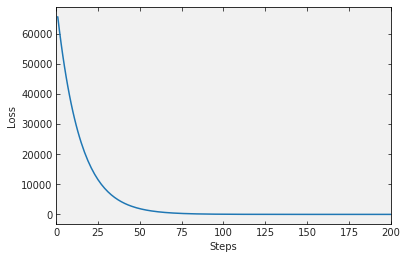

In [22]:
pl.plot(steps, loss_f)
pl.xlabel('Steps')
pl.ylabel('Loss')
plt.xlim(0, 200)
plt.xlim(0, 200)

#### Figure: Loss curve. Loss function decreasing with steps means the model is converging.